# Importing Libraries

In [1]:
#pip install imblearn

In [2]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')
# Import Libraries
import numpy as np 
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_context("talk", font_scale = 0.65, rc={"grid.linewidth": 5})
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 400)
from sklearn.linear_model import LogisticRegression,LinearRegression,LassoCV,Lasso
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA,IncrementalPCA
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold,StratifiedKFold
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score
from sklearn.metrics import precision_recall_curve,roc_auc_score,roc_curve
from imblearn.over_sampling import SMOTE,RandomOverSampler

In [4]:
telecom = pd.read_csv('telecom_churn_data.csv')
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
#Checking the shape
print(telecom.shape)
print('\n')
# Checking Dataset Info 
print(telecom.info(verbose=True,null_counts=True))

(99999, 226)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               99999 non-null int64
circle_id                   99999 non-null int64
loc_og_t2o_mou              98981 non-null float64
std_og_t2o_mou              98981 non-null float64
loc_ic_t2o_mou              98981 non-null float64
last_date_of_month_6        99999 non-null object
last_date_of_month_7        99398 non-null object
last_date_of_month_8        98899 non-null object
last_date_of_month_9        98340 non-null object
arpu_6                      99999 non-null float64
arpu_7                      99999 non-null float64
arpu_8                      99999 non-null float64
arpu_9                      99999 non-null float64
onnet_mou_6                 96062 non-null float64
onnet_mou_7                 96140 non-null float64
onnet_mou_8                 94621 non-null float64
onnet_mou_9                 92254 non-null float64
offnet_mou_6    

In [6]:
#Summary and checking outliers
telecom.describe(percentiles=[0.25,0.5,0.75,0.99])

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [7]:
#Function to check percentage of null values present in dataset 
def calnullpercentage(df):
    missing_num= df[df.columns].isna().sum().sort_values(ascending=False)
    missing_perc= (df[df.columns].isna().sum()/len(df)*100).sort_values(ascending=False)
    missing= pd.concat([missing_num,missing_perc],keys=['Total','Percentage'],axis=1)
    missing= missing[missing['Percentage']>0]
    return missing

In [8]:
# check the %age of null values
calnullpercentage(telecom)


,Total,Percentage
count_rech_2g_6,74846,74.846748
date_of_last_rech_data_6,74846,74.846748
count_rech_3g_6,74846,74.846748
av_rech_amt_data_6,74846,74.846748
max_rech_data_6,74846,74.846748
total_rech_data_6,74846,74.846748
arpu_3g_6,74846,74.846748
arpu_2g_6,74846,74.846748
night_pck_user_6,74846,74.846748
fb_user_6,74846,74.846748


In [9]:
# Number of columns having null values
print(len(calnullpercentage(telecom)))

166


`Out of 226 columns 166 have null values`

In [10]:
#Checking categorical and numerical columns 
telecom.select_dtypes(include='object').head(3)

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9
0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/21/2014,7/16/2014,8/8/2014,9/28/2014,6/21/2014,7/16/2014,8/8/2014,NaN
1,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/29/2014,7/31/2014,8/28/2014,9/30/2014,NaN,7/25/2014,8/10/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,9/30/2014,6/17/2014,7/24/2014,8/14/2014,9/29/2014,NaN,NaN,NaN,9/17/2014


In [11]:
#Finding categorical columns where dtype is float but those columns are having 0 or 1 values only
catg= []
for col in telecom.columns:
    if len(telecom[col].unique())== 2 | 3:
        catg.append(col)
catg

['night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [12]:
#Columns Types

#id columns 
id_cols = ['mobile_number' , 'circle_id']
print("Id columns :\n", id_cols)
print('\n')


#date_cols
date_cols = list(telecom.select_dtypes(include='object').columns)
print("Date columns :\n", date_cols)

cat_cols = catg
print( "\nCategorical columns :\n" ,cat_cols)

#numeric cols
num_cols  = [col for col in telecom.columns if col not in id_cols + date_cols + cat_cols ]

# print the number of columns in each list
print("\n#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column
print( len(id_cols)+len(date_cols)+ len(num_cols)+len(cat_cols) == len(telecom.columns))

Id columns :
 ['mobile_number', 'circle_id']


Date columns :
 ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']

Categorical columns :
 ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']

#ID cols: 2
#Date cols:12
#Numeric cols:204
#Category cols:8
True


## Filter high-value customers
We need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [13]:
# Deriving new columns for total recharge amount data for 6 and 7th month
telecom['tot_rech_amt_data_6'] = telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']
telecom['tot_rech_amt_data_7'] = telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7']
# Deriving new columns for total amount spent during  6 and 7th month
telecom['tot_amt_6'] = telecom[['total_rech_amt_6','tot_rech_amt_data_6']].sum(axis=1)
telecom['tot_amt_7'] = telecom[['total_rech_amt_7','tot_rech_amt_data_7']].sum(axis=1)
#first two months average
telecom['avg_amt_6_7'] = telecom[['tot_amt_6','tot_amt_7']].mean(axis=1)
# Filtering customers based on percentile having goodphase_avg more than or equal to cutoff of 70th percentile
telecom=telecom.loc[(telecom['avg_amt_6_7'] >= np.percentile(telecom['avg_amt_6_7'], 70))]
telecom.shape

(30001, 231)

` I have taken  recharge amount `more than or equal to X`, where X is the 70th percentile of the average recharge amount in the first two months and getting 30k rows. If I use `more than(>)sign`, will get 29.9k rows, but going with problem statement.`

In [14]:
# Deriving new columns for total recharge amount data for 8 and 9th month
telecom['tot_rech_amt_data_8'] = telecom['total_rech_data_8'] * telecom['av_rech_amt_data_8']
telecom['tot_rech_amt_data_9'] = telecom['total_rech_data_9'] * telecom['av_rech_amt_data_9']
# Deriving new columns for total amount spent during  8 and 9th month
telecom['tot_amt_8'] = telecom[['total_rech_amt_8','tot_rech_amt_data_8']].sum(axis=1)
telecom['tot_amt_9'] = telecom[['total_rech_amt_9','tot_rech_amt_data_9']].sum(axis=1)

In [15]:
# COnverting into categorical or object type
telecom[catg]=telecom[catg].apply(lambda x:x.astype('object'))
col_tmp=['total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_num_9','total_rech_data_6',\
        'total_rech_data_7','total_rech_data_8','total_rech_data_9']
telecom[col_tmp]=telecom[col_tmp].apply(lambda x:x.astype('object'))

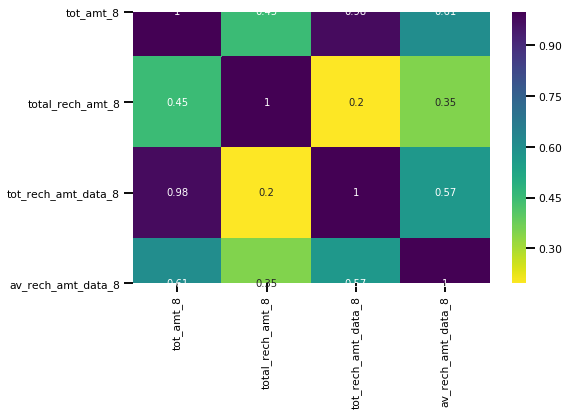

In [16]:
x=['tot_amt_8','total_rech_amt_8','tot_rech_amt_data_8','total_rech_data_8','av_rech_amt_data_8']
plt.figure(figsize=(8,5))
sns.heatmap(telecom[x].corr(),annot=True,cmap='viridis_r')

#### Dropping Redundant columns, since we have already created derived features from them and derived features reflects the same information.

In [17]:
telecom.drop(['tot_rech_amt_data_6','tot_rech_amt_data_7','tot_rech_amt_data_8',\
              'tot_rech_amt_data_9'],inplace=True,axis=1)


## Identifying CHURN CUSTOMERS 

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [18]:
# Where summation of columns = 0 then churn =1  else 0
telecom['churn']= np.where(telecom[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9',\
                                    'vol_3g_mb_9']].sum(axis=1)== 0,1,0)

In [19]:
# Removing all features having ‘ _9’, etc. in their names
telecom.drop(telecom.filter(regex='_9|sep', axis = 1).columns, axis=1,inplace=True)

In [20]:
## Churn Percentage
pd.DataFrame(round(telecom['churn'].value_counts(normalize=True)*100,2))

,churn
0,91.86
1,8.14


` approximately 92% customers not churned and 8% customers got churned. Also, we can see class imbalance is there and we will deal with it later` 

<b>`For each feature, it counts the values of that feature. If the most recurrent value of the feature is repeated almost in all the instances (*zeros / len(X) * 100 > 95*). Then it drops these features because their values are almost the same for all instances and will not help in learning process and those features are not useful in our prediction.`

In [21]:
telecom.shape

(30001, 176)

In [22]:
def redundant_feature(df):
    redundant = []
    for i in df.columns:
        counts = df[i].value_counts()
        count_max = counts.iloc[0]
        if count_max / len(df) * 100 > 95:
            redundant.append(i)
    redundant = list(redundant)
    return redundant



In [23]:
print('Before dropping Redundant features: ',telecom.shape)
redundant_features = redundant_feature(telecom)
telecom = telecom.drop(redundant_features, axis=1)
print('After dropping Redundant features: ',telecom.shape)

Before dropping Redundant features:  (30001, 176)
After dropping Redundant features:  (30001, 161)


`Function to impute NaN values where %age of missing values > 40%, Reason for taking cutoff 40% is beacuse for these columns we can replace NaN with 0(for example, fb_user_7, not used facebook(NaN),av_rech_amt_data_8, not done recharge(NaN) similarly for other columns.`

In [24]:
#Function to impute NaN with 0
def imputeNaN(df,col_name):
    for col in col_name:
        df[col].fillna(0,inplace=True)
col_40= calnullpercentage(telecom)[calnullpercentage(telecom)['Percentage']>40].index
#call function
imputeNaN(telecom,col_40)

In [25]:
# checking %age of null values
calnullpercentage(telecom)

,Total,Percentage
std_ic_t2f_mou_8,1174,3.913203
ic_others_8,1174,3.913203
loc_og_t2c_mou_8,1174,3.913203
loc_og_mou_8,1174,3.913203
loc_ic_t2m_mou_8,1174,3.913203
loc_og_t2f_mou_8,1174,3.913203
loc_og_t2m_mou_8,1174,3.913203
loc_ic_t2f_mou_8,1174,3.913203
std_og_t2f_mou_8,1174,3.913203
loc_og_t2t_mou_8,1174,3.913203


In [26]:
pd.DataFrame((telecom[calnullpercentage(telecom).index]==0).sum()).head(10)

,0
std_ic_t2f_mou_8,21248
ic_others_8,21405
loc_og_t2c_mou_8,21262
loc_og_mou_8,2379
loc_ic_t2m_mou_8,1364
loc_og_t2f_mou_8,14422
loc_og_t2m_mou_8,2576
loc_ic_t2f_mou_8,9189
std_og_t2f_mou_8,24613
loc_og_t2t_mou_8,3887


` As we can see from above missing value dataframe and value count == 0, large percentage of values are zero in missing value columns. I can impute most missing value column having NaN value with 0 if I assume that they have not use local incoming service, special outgoing service that is why these columns have NaN values. But this assumption doesn't helping much beacuse most values in these columns have 0 and it infers the same thing. So dropping these missing value columns.`

In [27]:
telecom= telecom.dropna()
telecom.shape

(28163, 161)

`After dropping missing values will result in dropping 1838 or 6% rows`

In [28]:
# Checking missing value percentage if any
calnullpercentage(telecom) #no missing value

,Total,Percentage


In [29]:
telecom.head(3)

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,tot_amt_6,tot_amt_7,avg_amt_6_7,tot_amt_8,churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,802,57.74,19.38,18.74,1580.0,790.0,1185.0,3638.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,6/25/2014,7/31/2014,8/30/2014,50,0,10,0,7/31/2014,8/23/2014,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,0.0,19.83,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,0.0,1.0,1.0,315,21.03,910.65,122.16,437.0,955.

In [30]:
# no duplicate mobile number
len(telecom['mobile_number'].unique())

28163

In [31]:
#Dropping mobile number since it doesn't help in modelling and prediction 
telecom.drop('mobile_number',inplace=True,axis=1)

# Data Visualisation and EDA

#### Function to show values on bar plot

In [32]:
def showvalues(ax,m=None):
    for p in ax.patches:
        ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),\
                    ha='center', va='center', fontsize=14, color='k', rotation=0, xytext=(0, 7),\
                    textcoords='offset points',fontweight='light',alpha=0.9) 

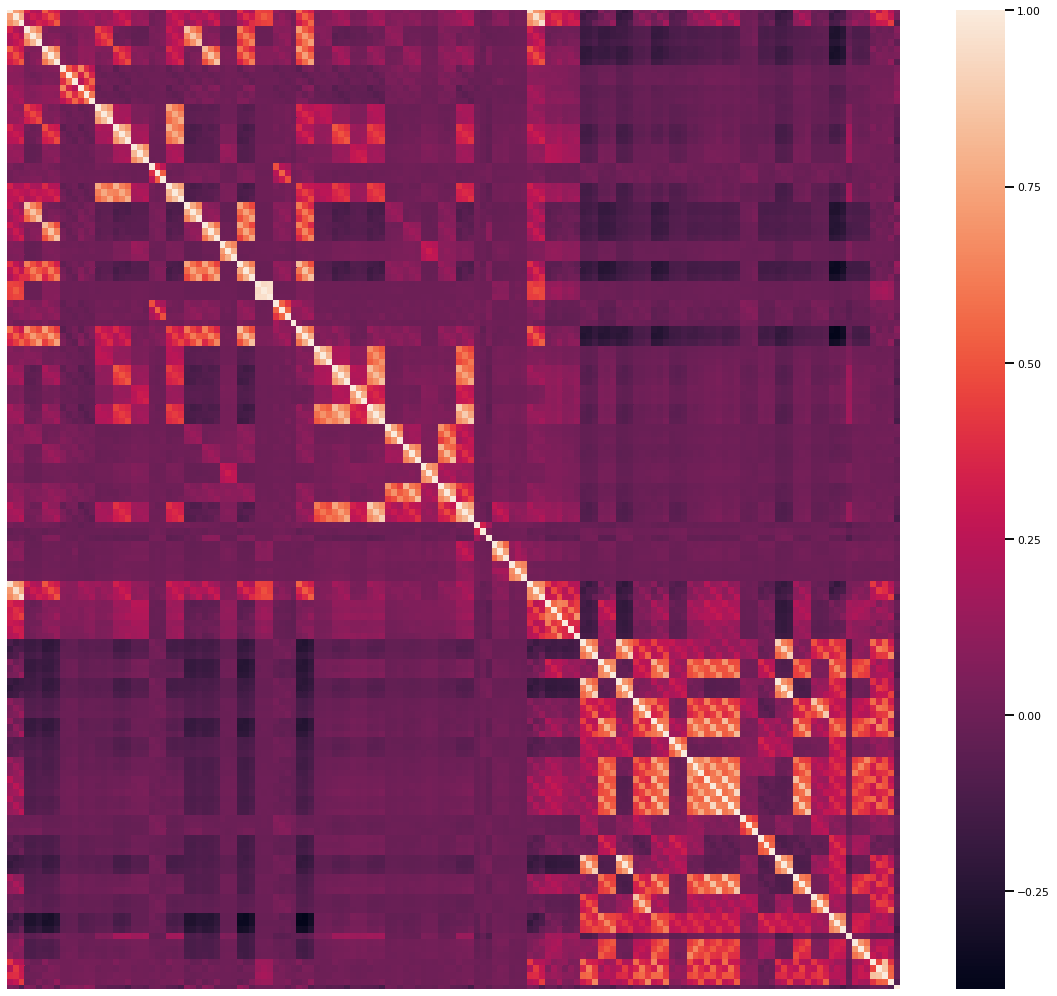

In [33]:
#### Correlation between numerical variables
plt.figure(figsize=(20,18))
ax=sns.heatmap(telecom.corr())
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)

`As we can see from the graph, correlation is present between features. We will take care of correlated features later using techniques like PCA, t-SNE or any  other suitable technique for this problem`

In [34]:
# Function to plot distribution plot for months(6,7 and 8) for churn and non churn customers. 
# Also, plotting box plot and strip plot for the same.
def dist_box_plot(df,col1,col2,col3):    
    fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(20, 4))
    ax = sns.distplot(df[df['churn']==1][col1], bins = 40, ax = axes[0], kde = False,\
                      color='#2980B9',hist_kws={"alpha": 1})
    ax.set_title('Churn',fontweight='bold',size=20)
    ax = sns.distplot(df[df['churn']==0][col1], bins = 40, ax = axes[1], kde = False,\
                     color='#E67E22',hist_kws={"alpha": 1})
    ax.set_title('Non-Churn',fontweight='bold',size=20)
    ax = sns.distplot(df[df['churn']==1][col2], bins = 40, ax = axes[2], kde = False,\
                     color='#2980B9',hist_kws={"alpha": 1})
    ax.set_title('Churn',fontweight='bold',size=20)
    ax = sns.distplot(df[df['churn']==0][col2], bins = 40, ax = axes[3], kde = False,\
                     color='#E67E22',hist_kws={"alpha": 1})
    ax.set_title('Non-Churn',fontweight='bold',size=20)
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 4))
    ax=sns.boxplot(x='churn', y=col1, data=df,ax=axes[0])
    ax=sns.stripplot(x='churn', y=col1, data=df, jitter=True, edgecolor="gray",ax=axes[0])
    ax.yaxis.label.set_visible(False)
    ax.set_title(col1,fontweight='bold',size=20)
    ax=sns.boxplot(x='churn', y=col2, data=df,ax=axes[1])
    ax=sns.stripplot(x='churn', y=col2, data=df, jitter=True, edgecolor="gray",ax=axes[1])
    ax.yaxis.label.set_visible(False)
    ax.set_title(col2,fontweight='bold',size=20)
    fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 4))
    ax = sns.distplot(df[df['churn']==1][col3], bins = 40, ax = axes[0], kde = False,\
                     color='#2980B9',hist_kws={"alpha": 1})
    ax.set_title('Churn',fontweight='bold',size=20)
    ax = sns.distplot(df[df['churn']==0][col3],bins=40, ax = axes[1], kde = False,\
                     color='#E67E22',hist_kws={"alpha": 1})
    ax.set_title('Non-Churn',fontweight='bold',size=20)
    ax=sns.boxplot(x='churn', y=col3, data=df,ax=axes[2])
    ax=sns.stripplot(x='churn', y=col3, data=df, jitter=True, edgecolor="gray",ax=axes[2])
    ax.yaxis.label.set_visible(False)
    ax.set_title(col3,fontweight='bold',size=20)
    plt.show()

## arpu (Average Revenue per user)

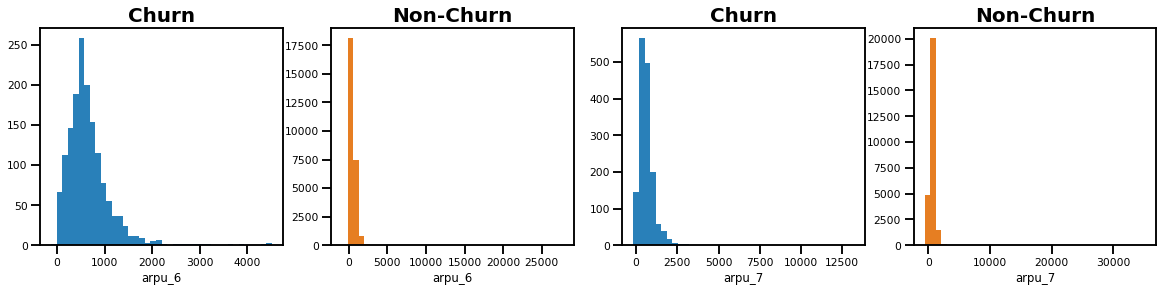

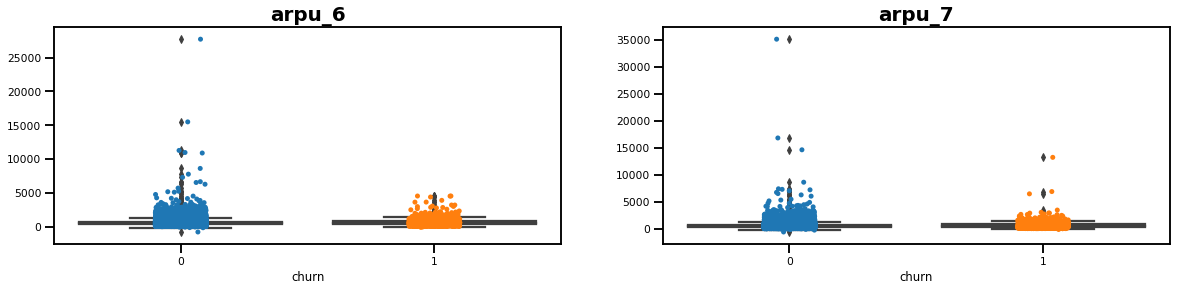

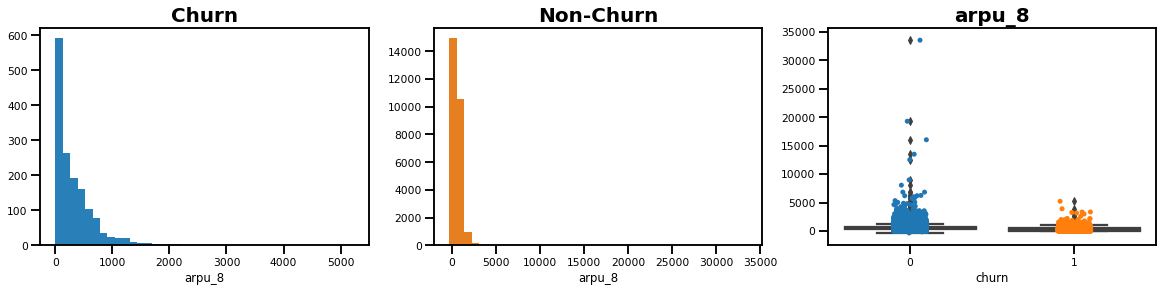

In [35]:
dist_box_plot(telecom,'arpu_6','arpu_7','arpu_8')

` As we can see that Non churn customers contribute more to the revenue.Also there are lots of outlier exists in revenue as some customers might using higher data and recharging frequently

### onnnet_mou (Minutes of usage for all kind of calls within the same operator network)

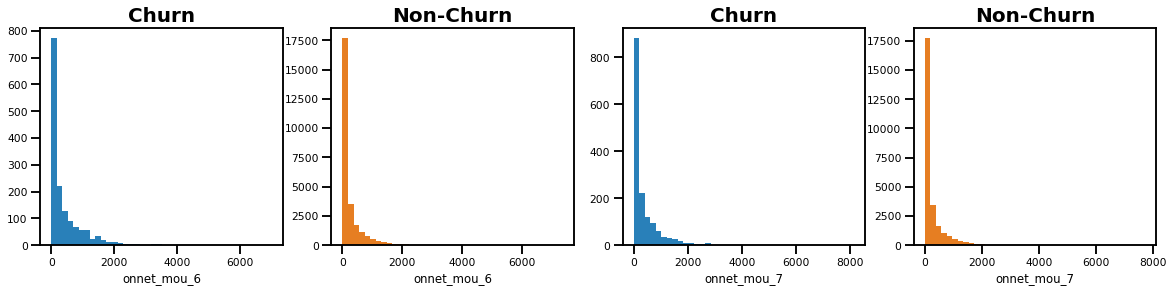

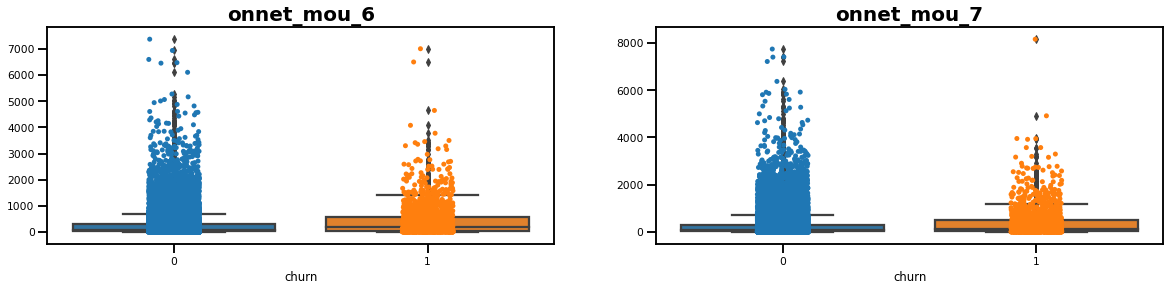

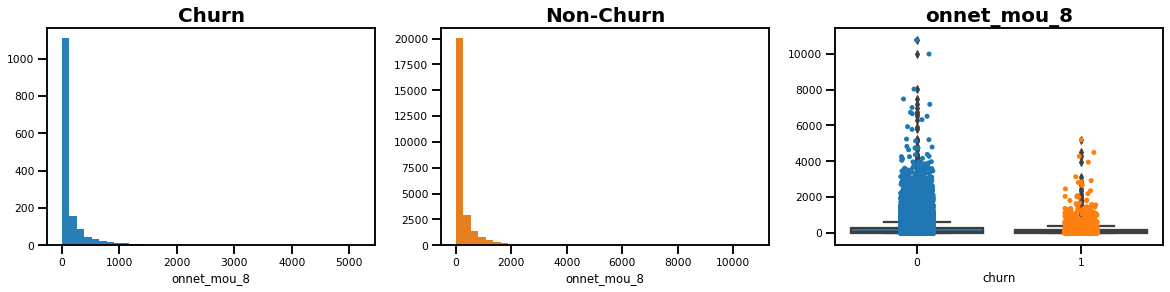

In [36]:
dist_box_plot(telecom,'onnet_mou_6','onnet_mou_7','onnet_mou_8')

- distribution for OnNet Minutes of usage looks similar for Churn and Non churn customers as Churn has less count because of class imbalance 

### offnet_mou (Minutes of usage for All kind of calls outside the operator T network)

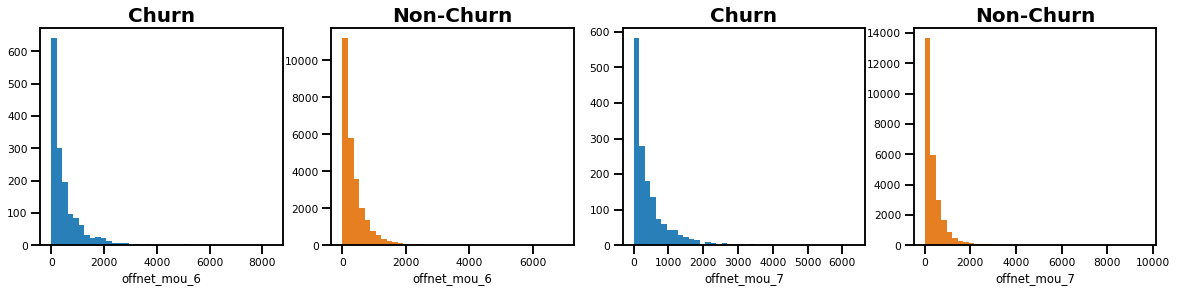

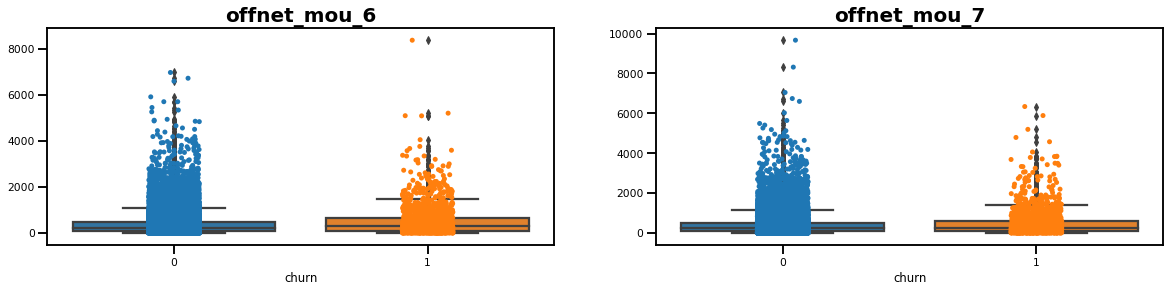

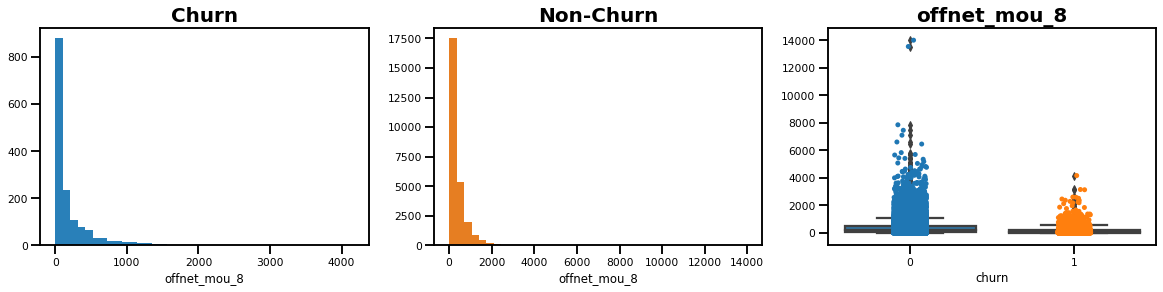

In [37]:
dist_box_plot(telecom,'offnet_mou_6','offnet_mou_7','offnet_mou_8')

`We can see Lots of outliers present in Offnet minutes of usage for all the months

### roam_ic_mou (Minutes of usage on roaming incoming calls)

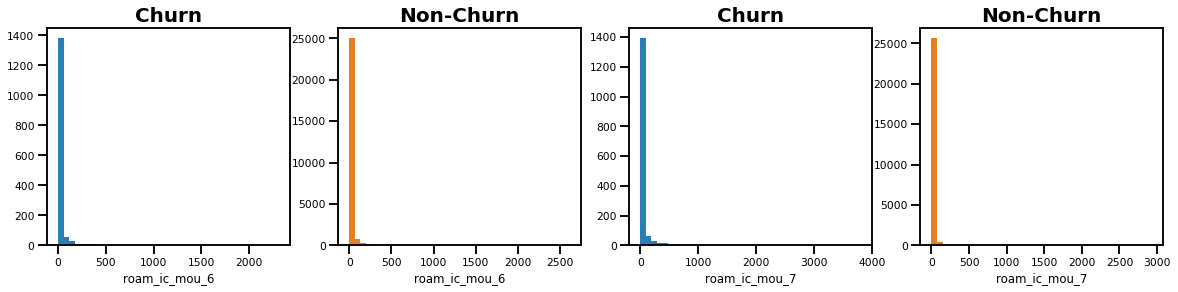

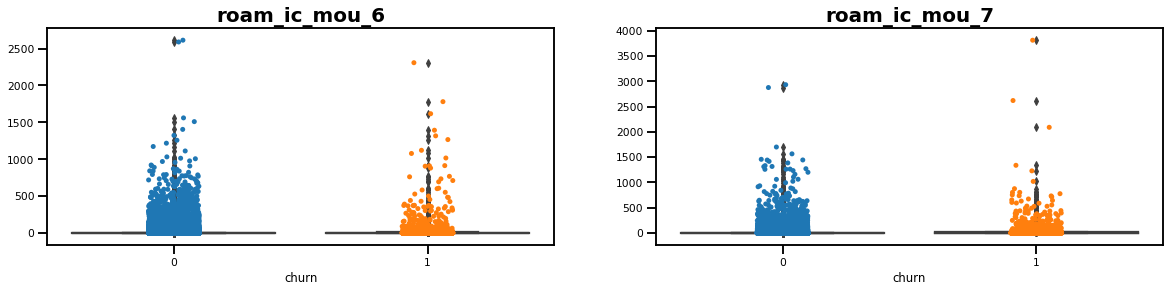

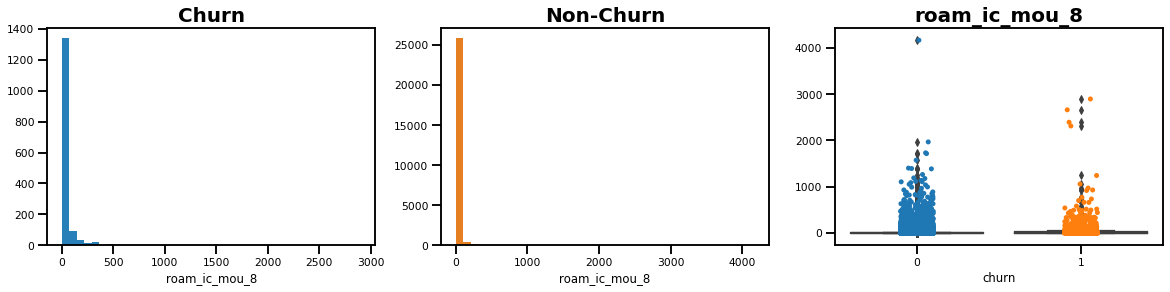

In [38]:
dist_box_plot(telecom,'roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8')

`As compard to other parameters it looks like customers uses less services during roaming. Also there are outlier present for churn and non churn cases.

### loc_og_t2t_mou (Minutes of usage within same operator on local outgoing calls)

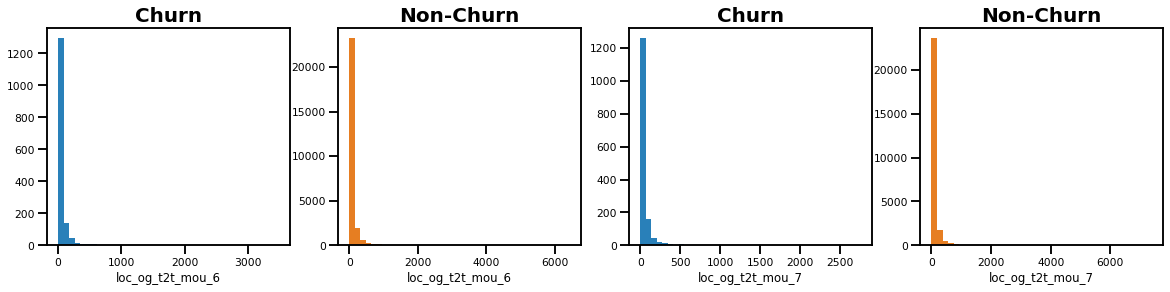

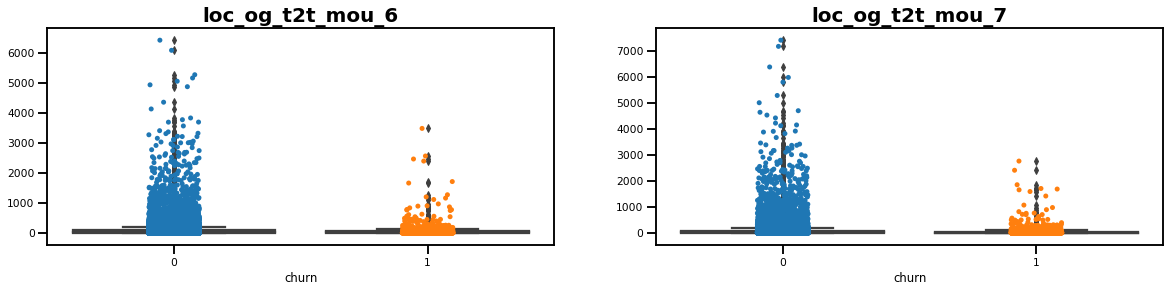

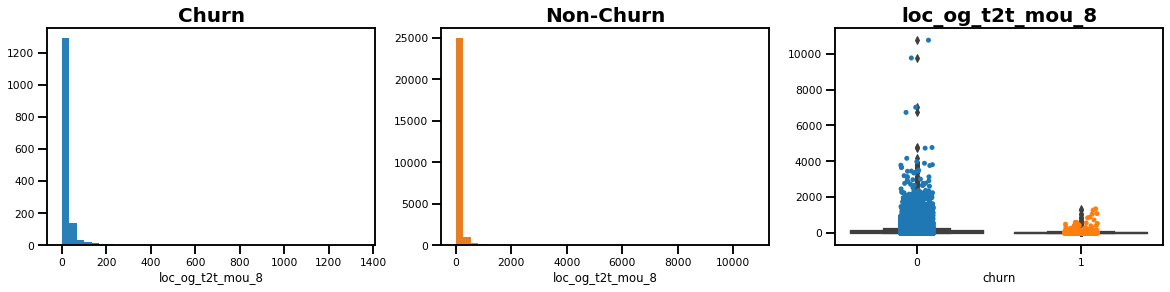

In [39]:
dist_box_plot(telecom,'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8')

`local outgoing call with in same operator are equily distributed for churn and Non Churn customers

### loc_og_t2m_mou  (Minutes of usage from operator T to fixed line T on local outgoing calls)

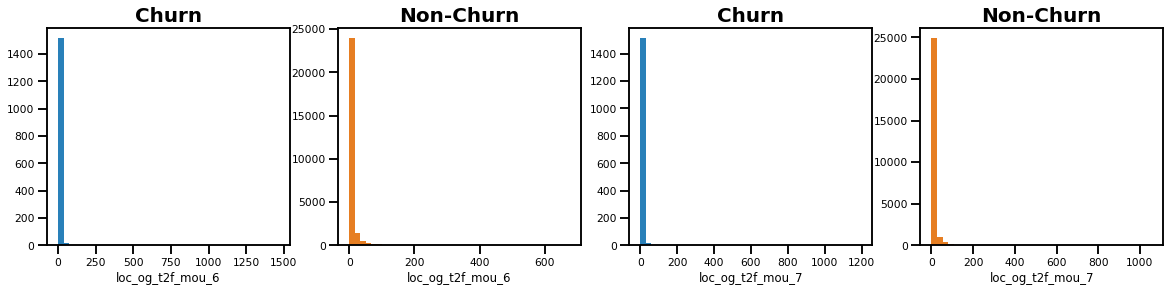

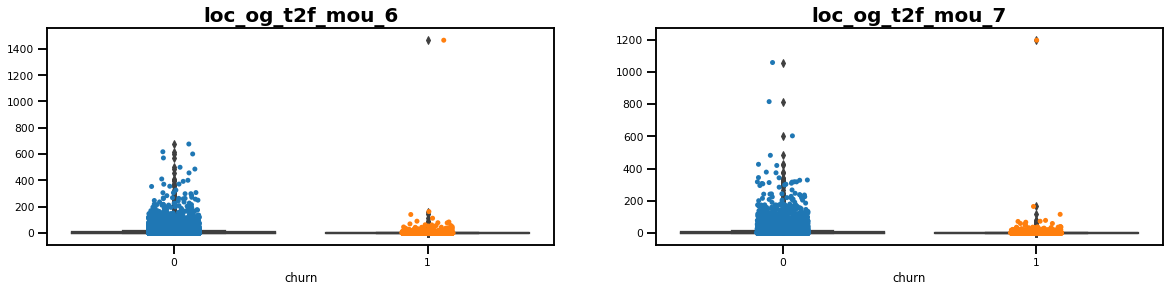

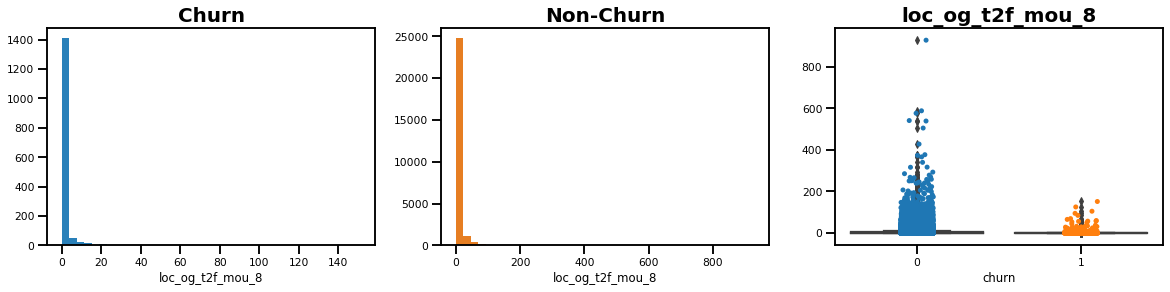

In [40]:
dist_box_plot(telecom,'loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8')

`As we can see clearly very less usage of Minutes of usage from operator T to fixed line T on local outgoing calls, which means customers prefer calling mobile.  

### std_og_t2t_mou  (Minutes of usage within same operator on STD outgoing calls)

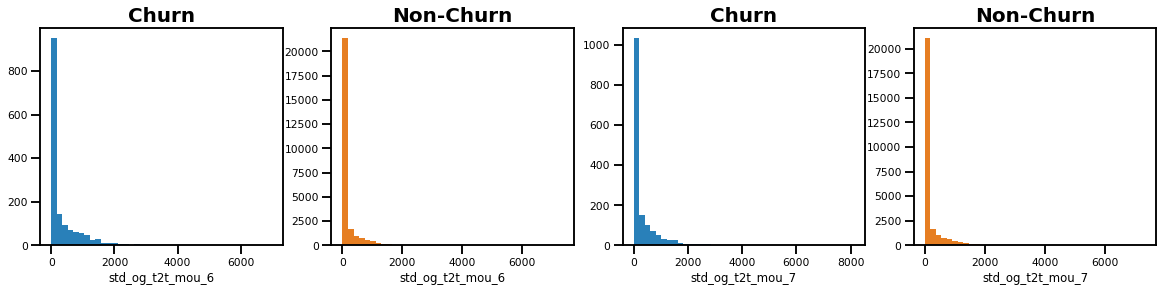

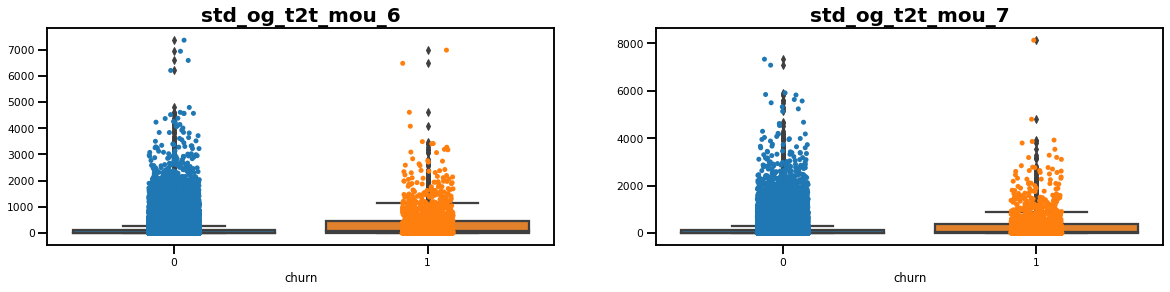

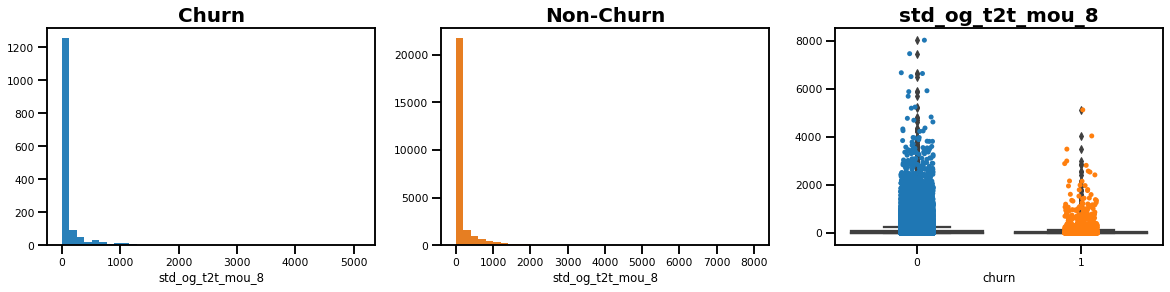

In [41]:
dist_box_plot(telecom,'std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8')

`Many customers are calling within same operator on STD outgoing calls. Also there are lots of outliers. We can see decrease of distribution in 8th month

### isd_og_mou  (Minutes of usage  on ISD outgoing calls)

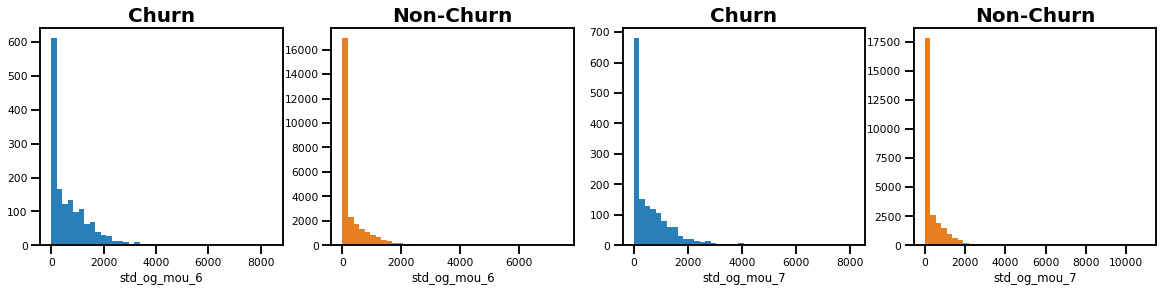

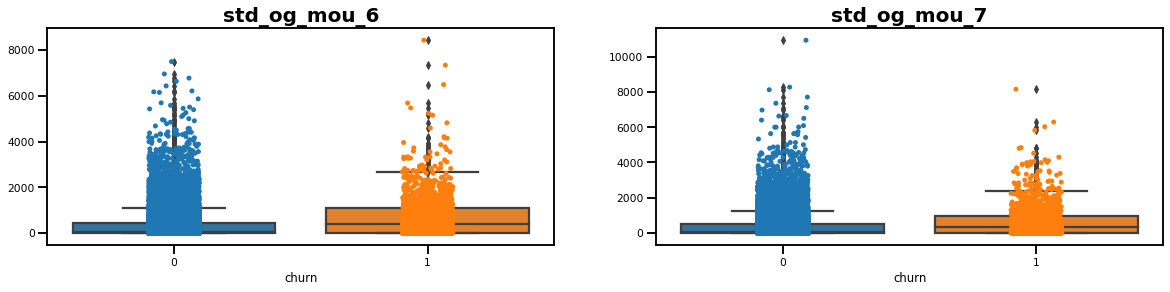

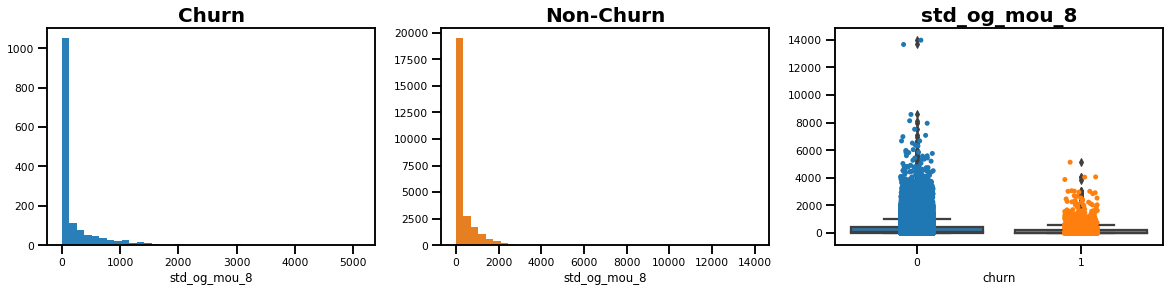

In [45]:
dist_box_plot(telecom,'std_og_mou_6','std_og_mou_7','std_og_mou_8')

`Surprisingly lots of customers are using International calls 

### spl_og_mou  (Minutes of usage  on Special calls)

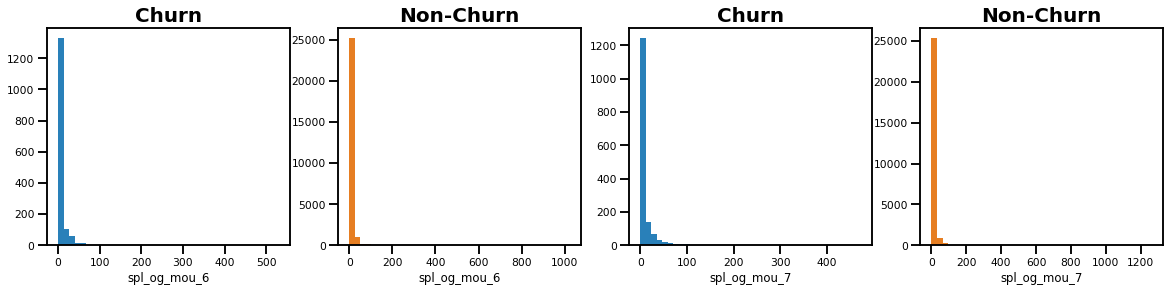

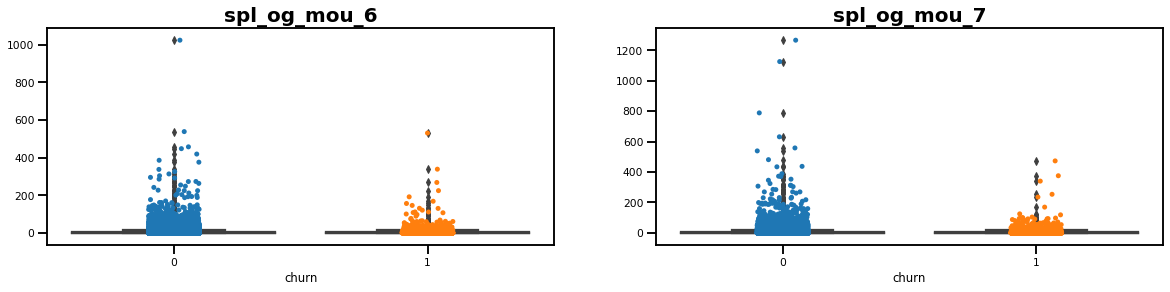

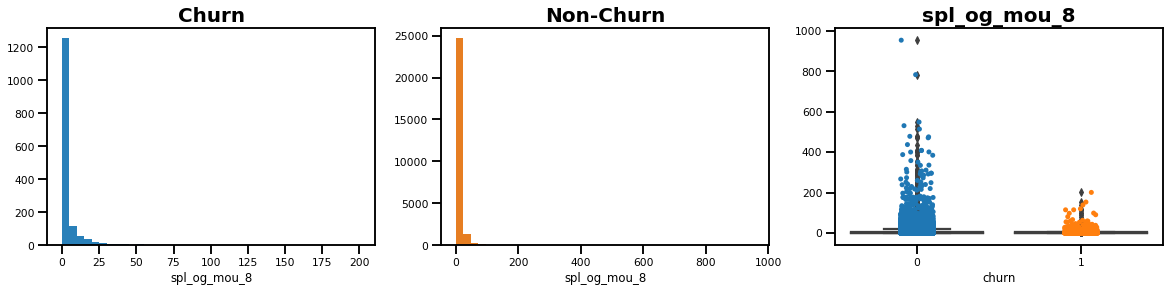

In [46]:
dist_box_plot(telecom,'spl_og_mou_6','spl_og_mou_7','spl_og_mou_8')

`Only few cusotmers are using special call service , but we have some outliers too.

### loc_ic_t2t_mou  (Minutes of usage within same operator on local incoming calls)

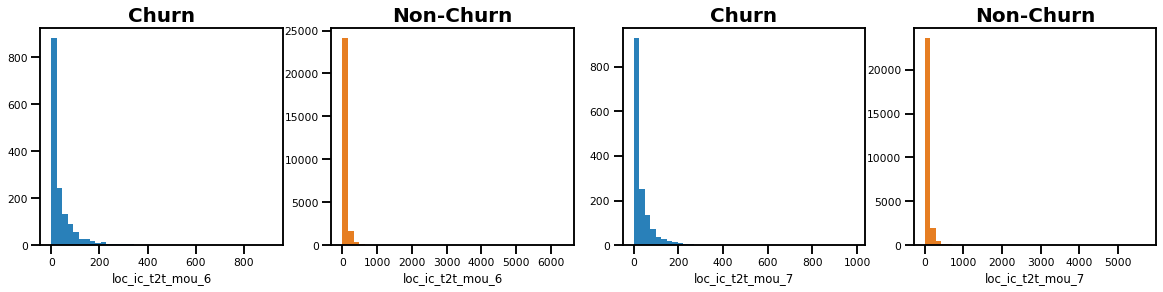

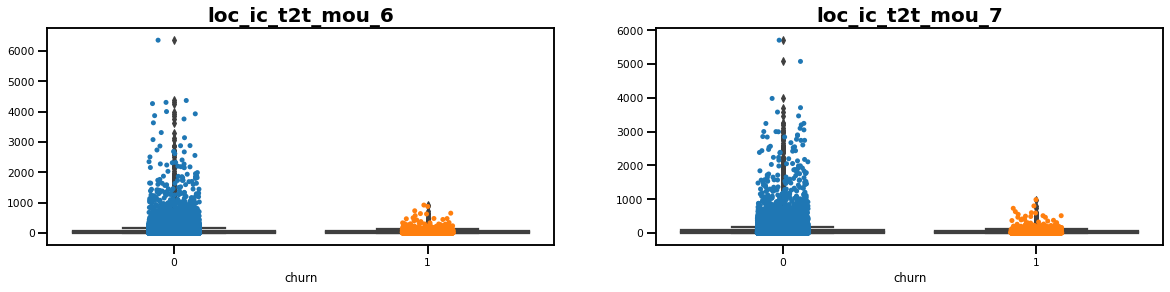

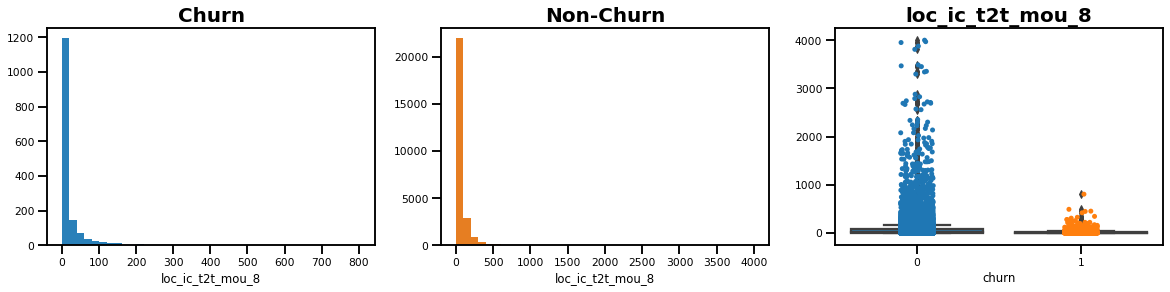

In [47]:
dist_box_plot(telecom,'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8')

`Local Incoming calls minutes of usage are reduced in 8th month. Huge outliers for Non churn customers

### loc_ic_t2f_mou  (Minutes of usage from Operator T to fixed lines of T on local incoming calls)

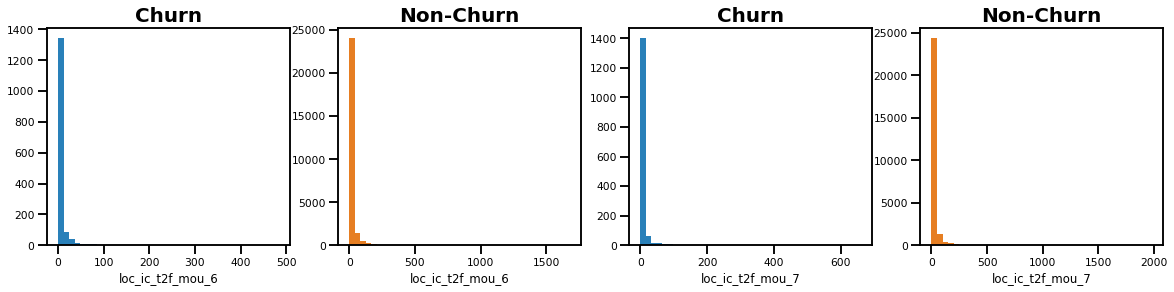

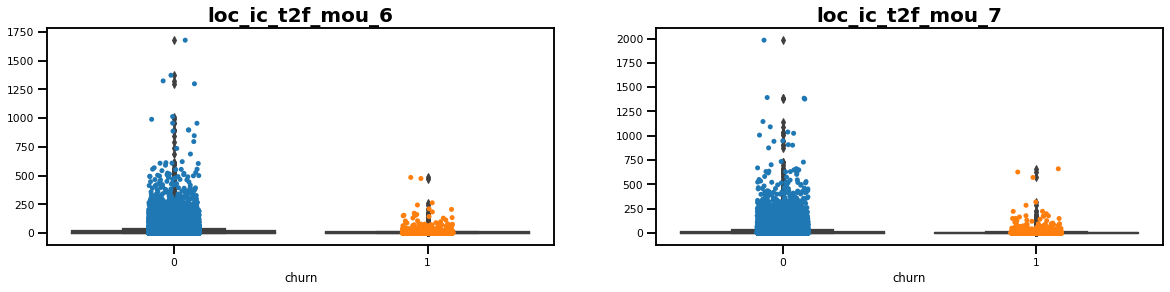

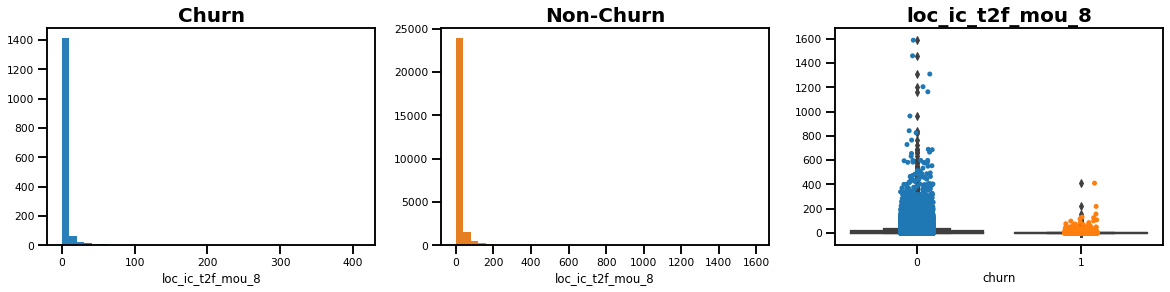

In [48]:
dist_box_plot(telecom,'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8')

In [ ]:
` Only few customer are calling to Fixed line 

### total_ic_mou  (Total Minutes of usage on incoming calls)

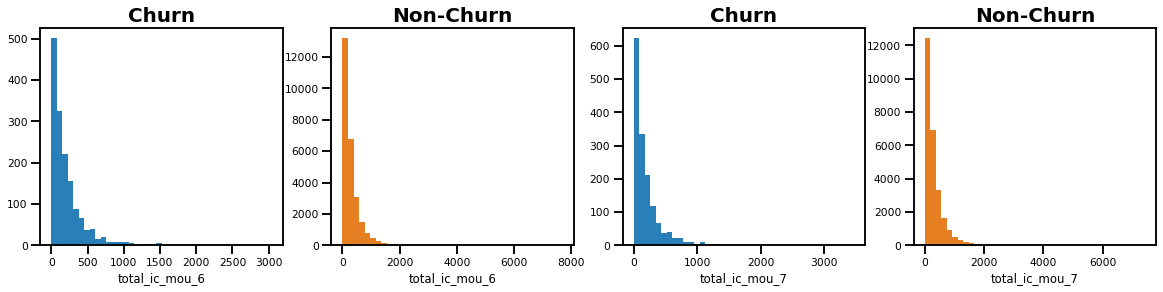

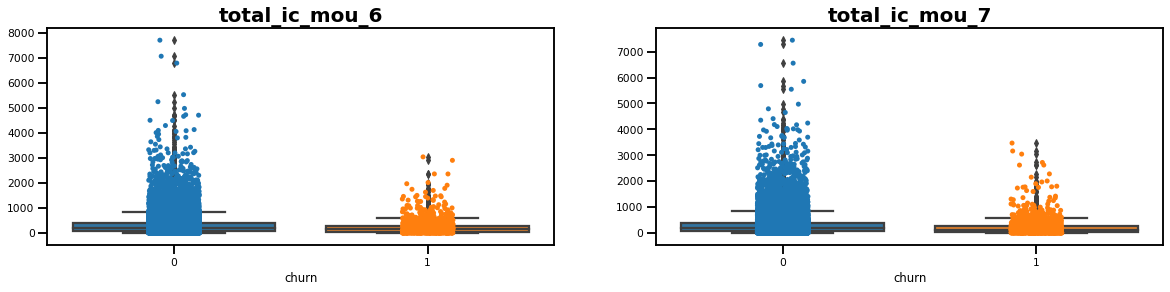

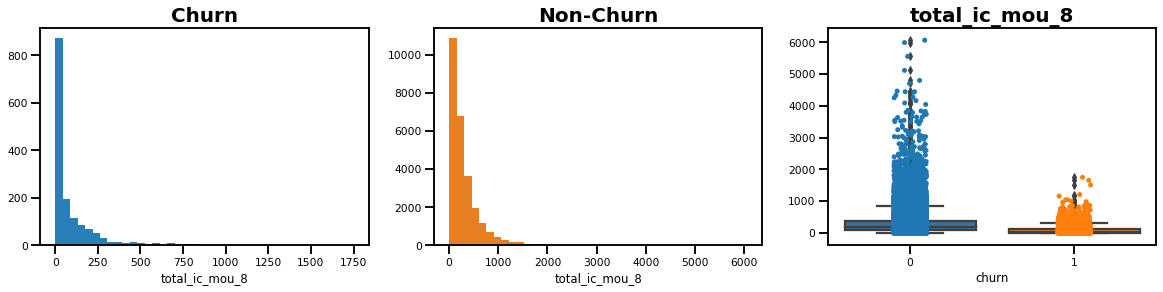

In [49]:
dist_box_plot(telecom,'total_ic_mou_6','total_ic_mou_7','total_ic_mou_8')

`Significant drop in Total Minutes of usage on incoming calls for 8th month for churn customers. Outliers are also present for churn and non churn

### total_rech_amt (Total Reacharge Amount)

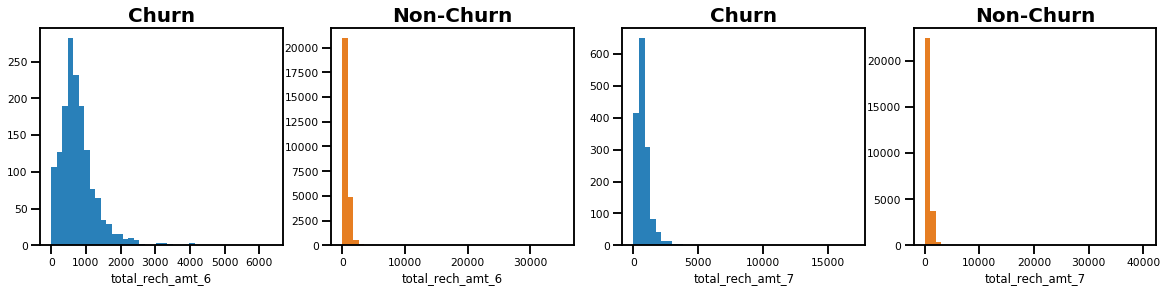

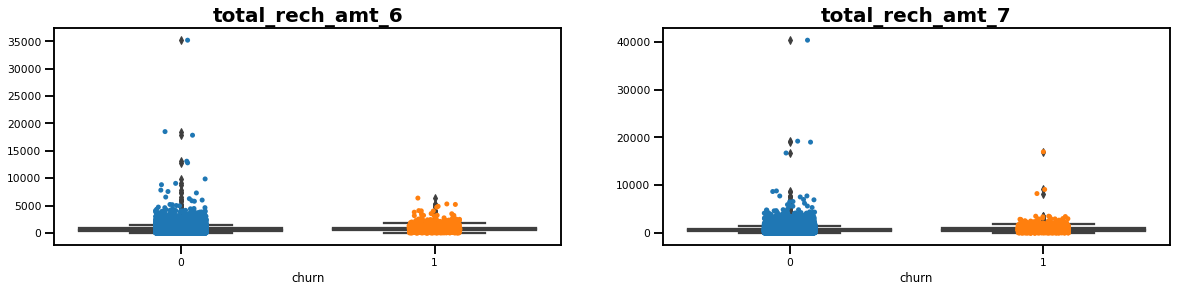

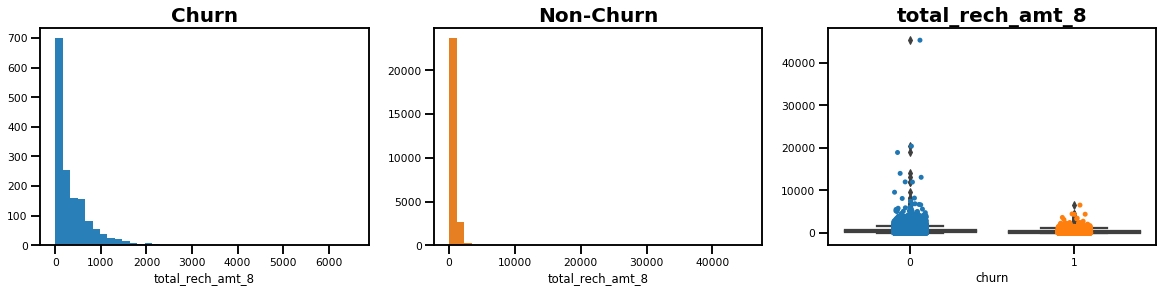

In [50]:
dist_box_plot(telecom,'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8')

`Total recharge amount distribution is getting increased  from 6 to 7th month and then getting decrease in 8th month for Churn customers

### max_rech_amt (Max Reacharge Amount)

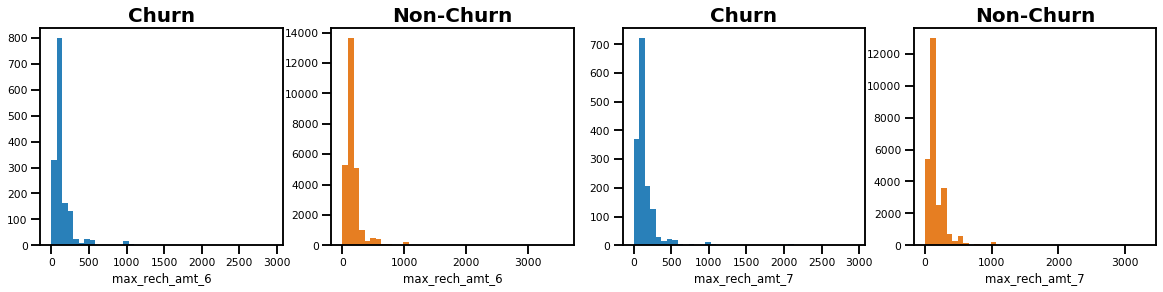

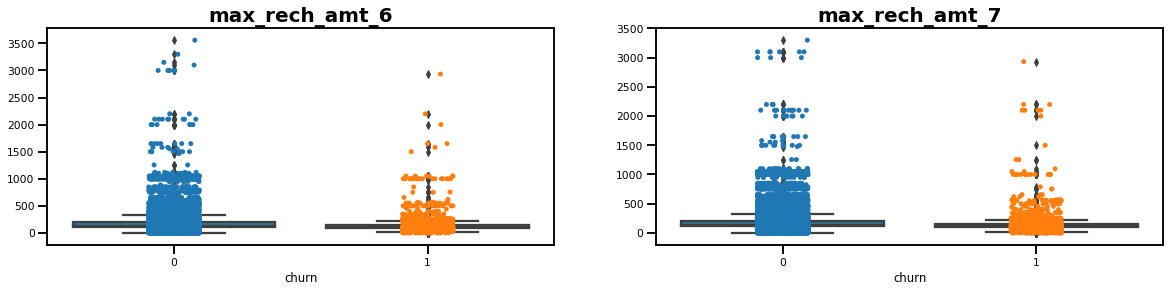

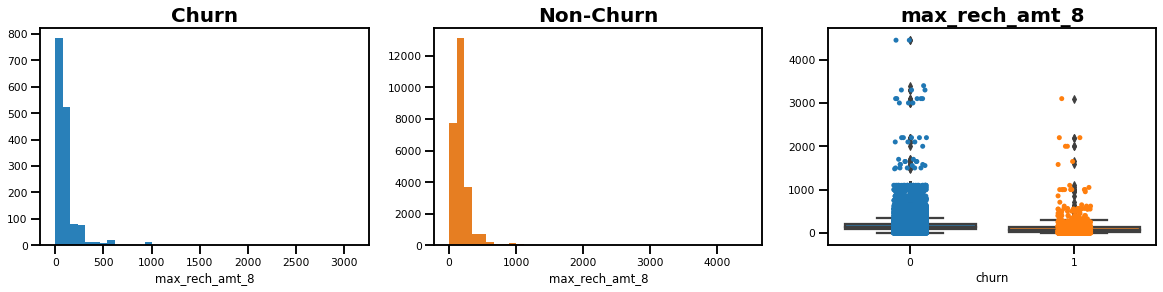

In [52]:
dist_box_plot(telecom,'max_rech_amt_6','max_rech_amt_7','max_rech_amt_8')

`Max Reacharge Amount is high in 8th month for Churn customers

### last_day_rch_amt (Last day Reacharge Amount)

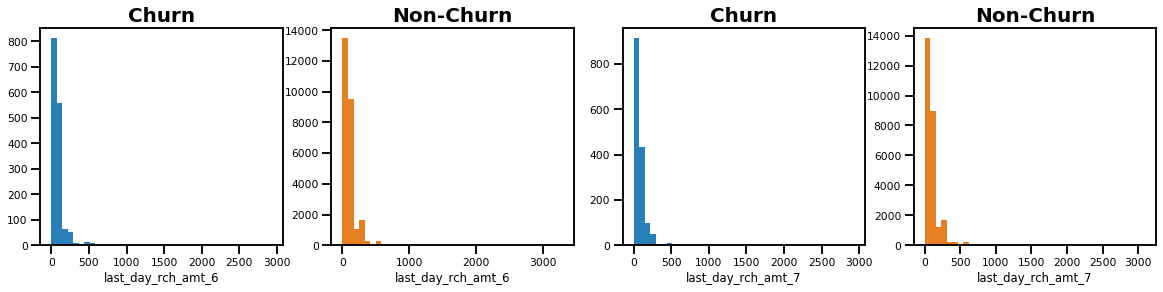

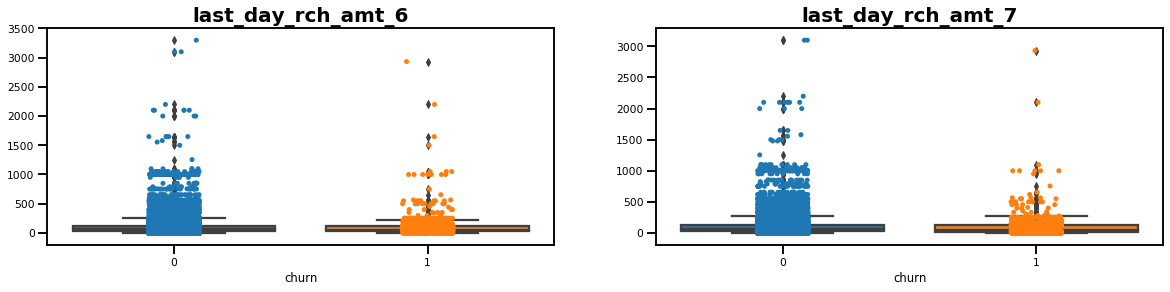

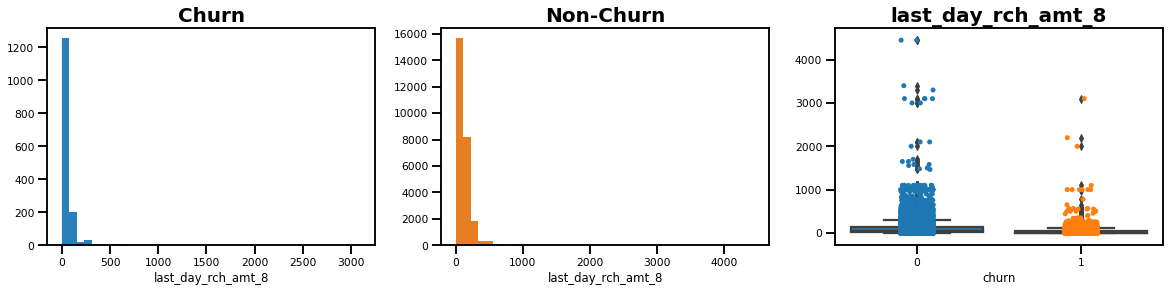

In [53]:
dist_box_plot(telecom,'last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8')

`Many Last day Reacharge counts in 8th month for churn customers

### max_rech_data (Max Reachrge Data)

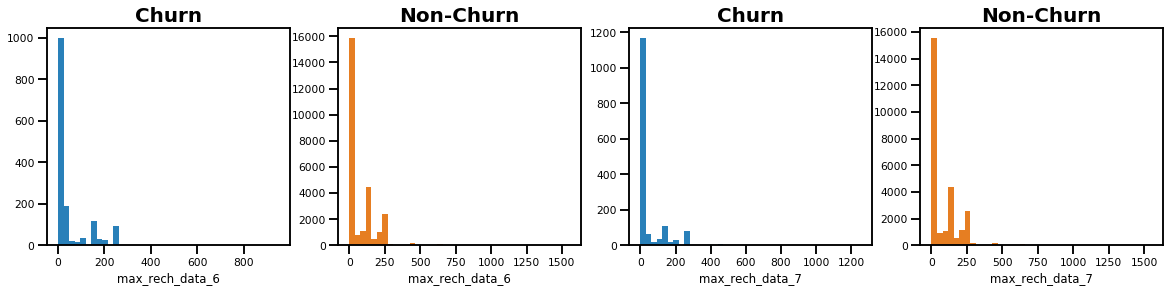

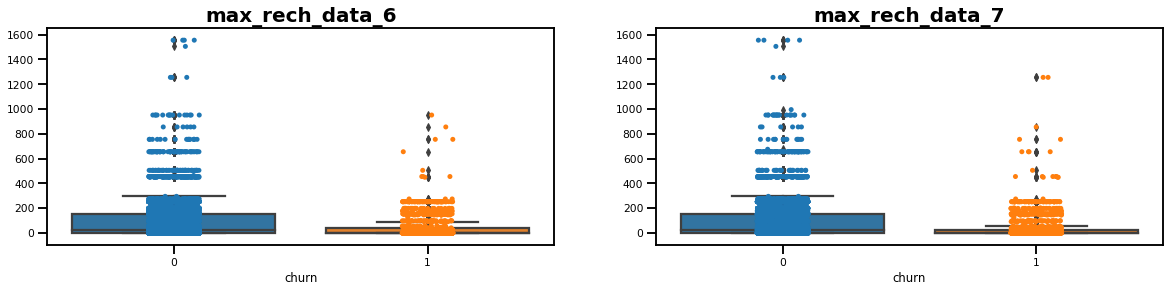

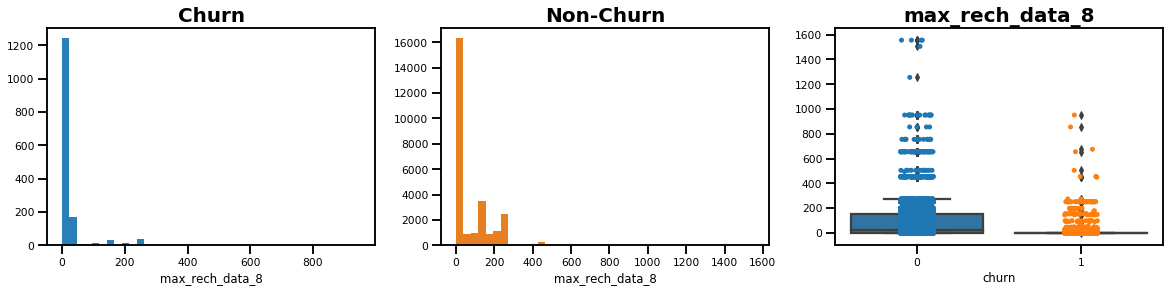

In [54]:
dist_box_plot(telecom,'max_rech_data_6','max_rech_data_7','max_rech_data_8')

`It looks like many customers are using high data as their huge outliers

### av_rech_amt_data (Average recharge amount data)

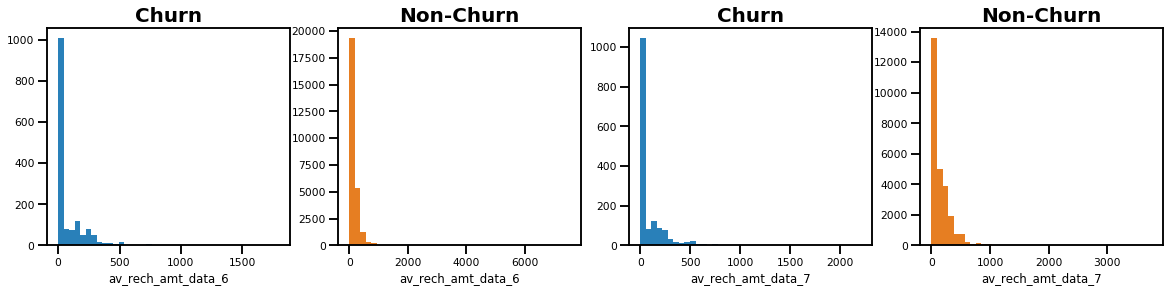

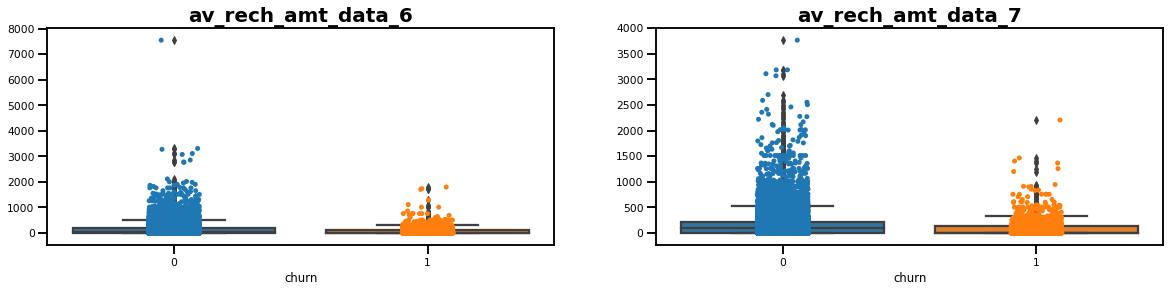

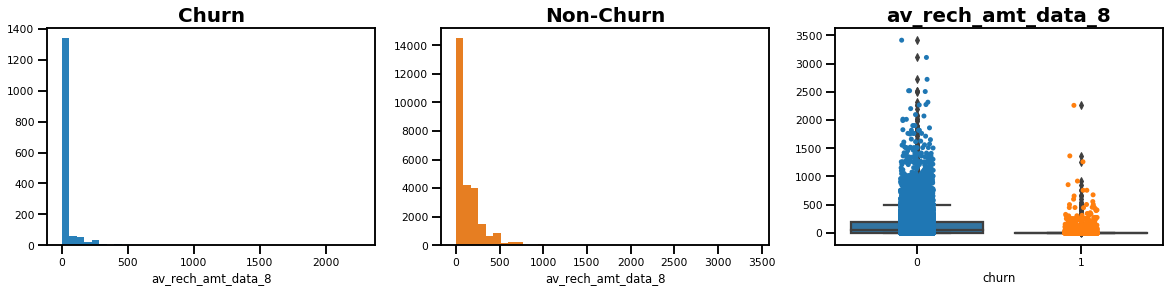

In [55]:
dist_box_plot(telecom,'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8')

`Average recharge amount data is decreased in 8th month for churn customers

### vol_2g_mb (2g data volume in Mb)

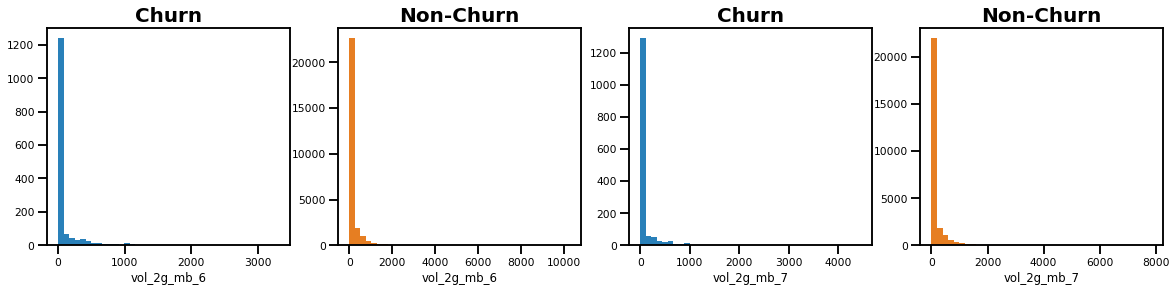

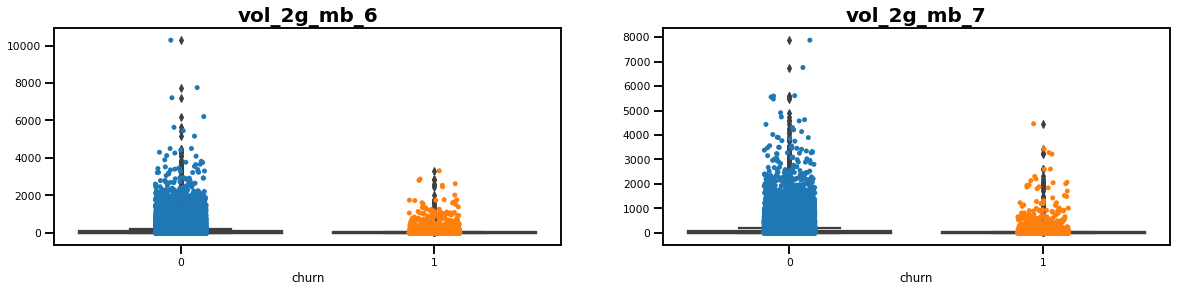

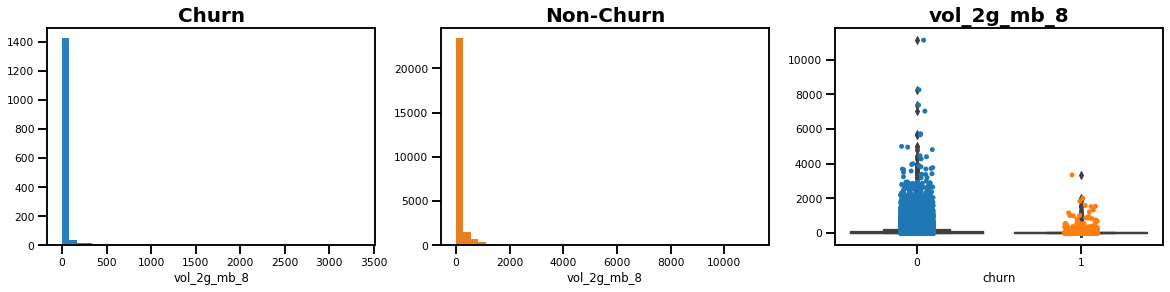

In [56]:
dist_box_plot(telecom,'vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8')

`2g data volume in Mb decreased in 8th month for churn customers

### vol_3g_mb (3g data volume in Mb)

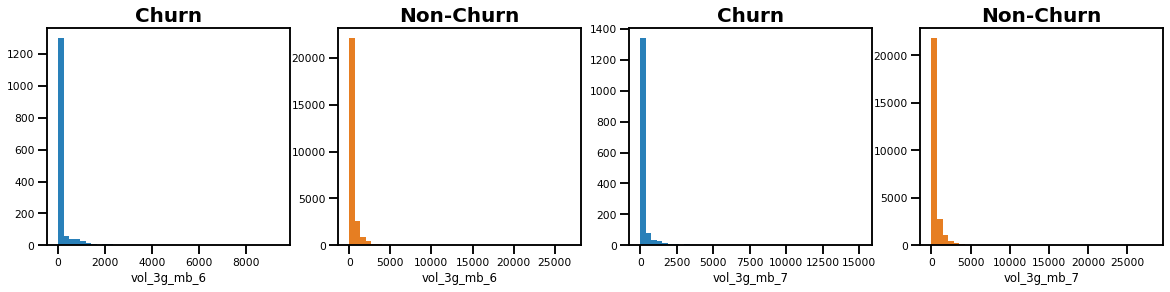

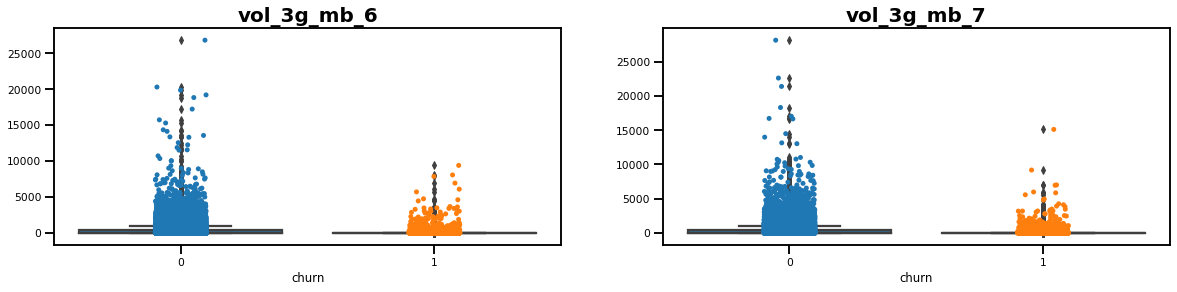

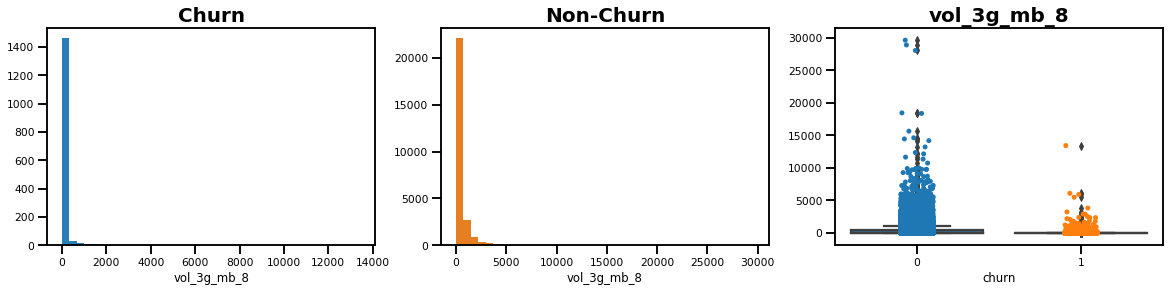

In [57]:
dist_box_plot(telecom,'vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8')

`We can see same trend here as 3g data volume in Mb usage decreased in 8th month (for churn customers)

### arpu_3g (Avg Revenue per user from 3g data)

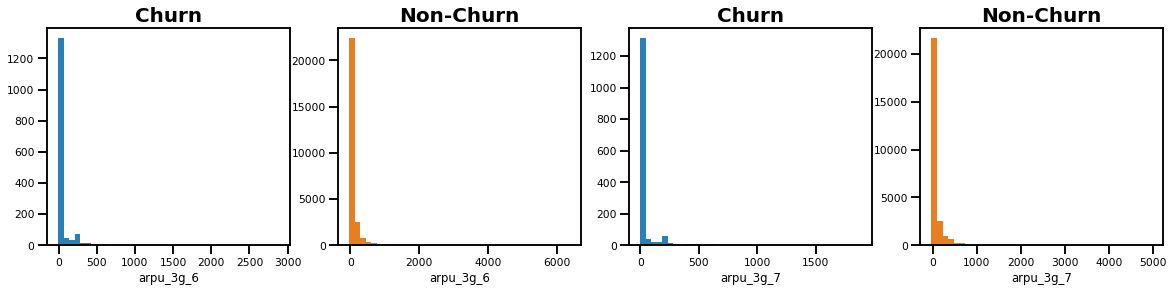

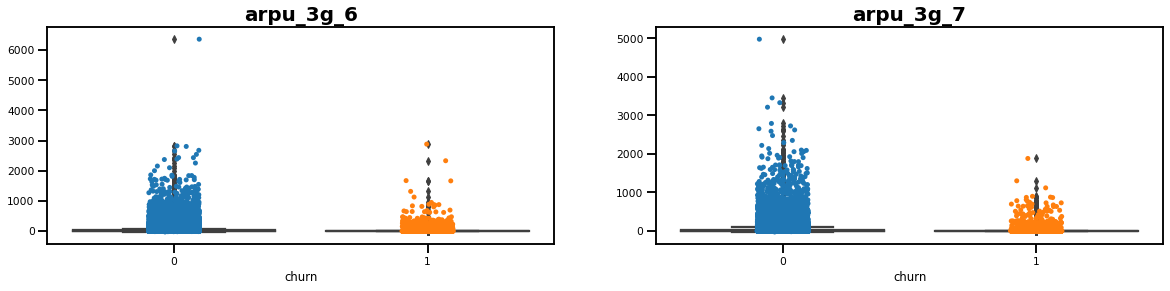

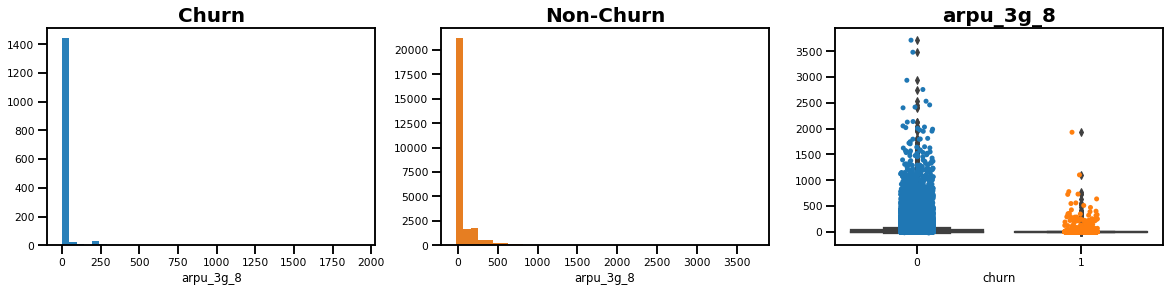

In [58]:
dist_box_plot(telecom,'arpu_3g_6','arpu_3g_7','arpu_3g_8')

`Significant drop in Avg Revenue per user from 3g data in 8th month for churn customers

### arpu_2g (Avg Revenue per user from 2g data)

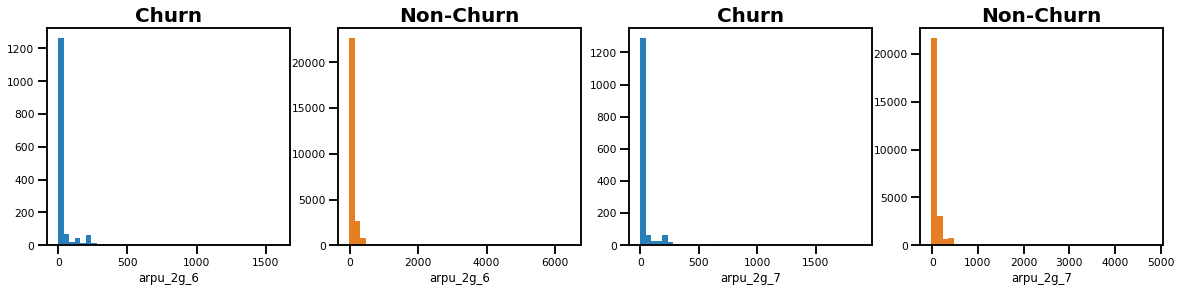

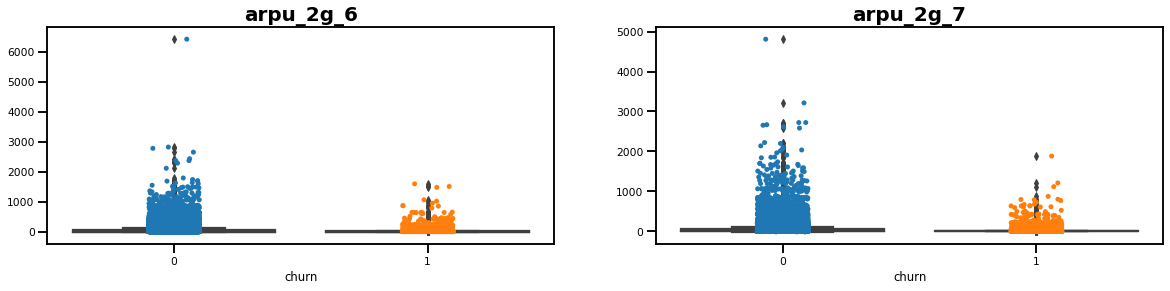

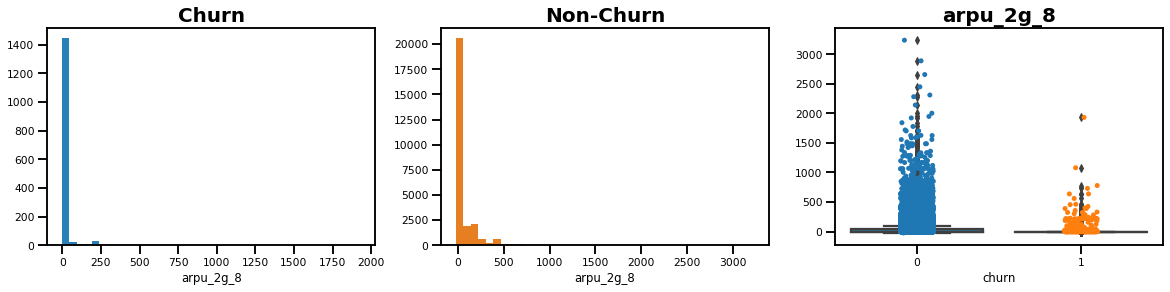

In [59]:
dist_box_plot(telecom,'arpu_2g_6','arpu_2g_7','arpu_2g_8')

`Similalry gignificant drop in Avg Revenue per user for 2g data for churn customers

### month_vbc (Volume based cost - when no specific scheme is not purchased and paid as per usage)

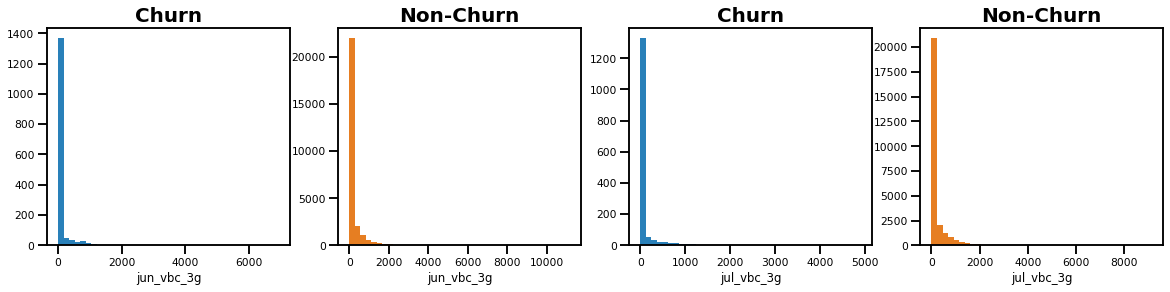

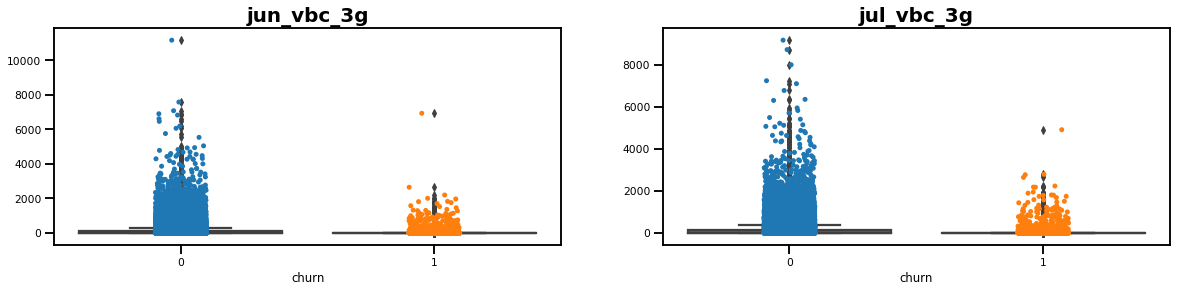

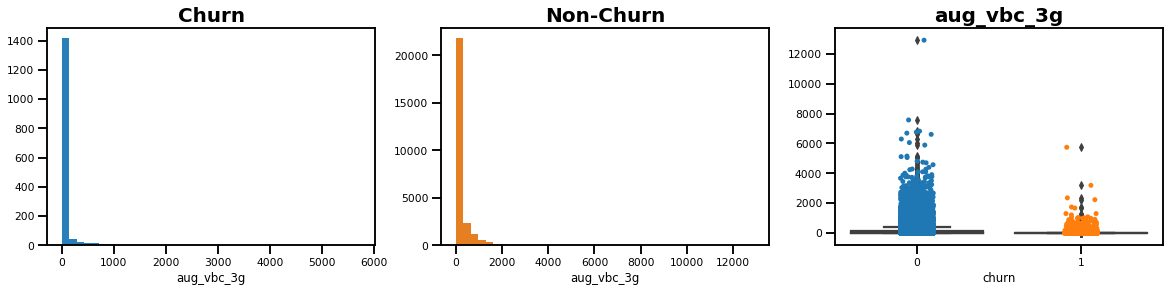

In [60]:
dist_box_plot(telecom,'jun_vbc_3g','jul_vbc_3g','aug_vbc_3g')

` Decrease in Volume based cost - when no specific scheme is not purchased and paid as per usage in 8th month for churn customers

### tot_amt (Total amount)

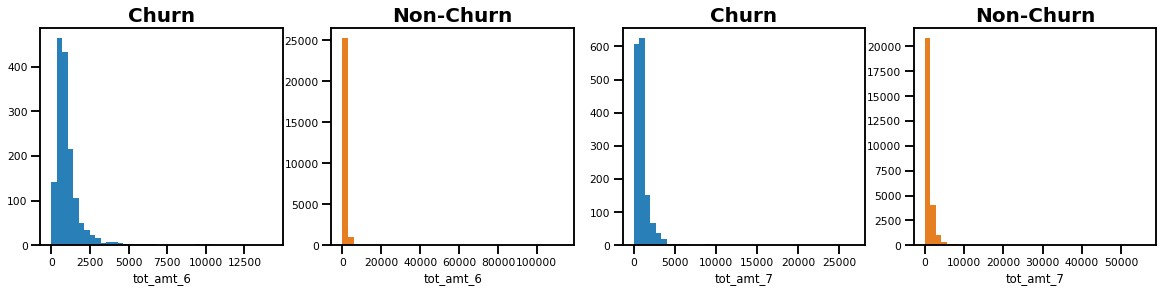

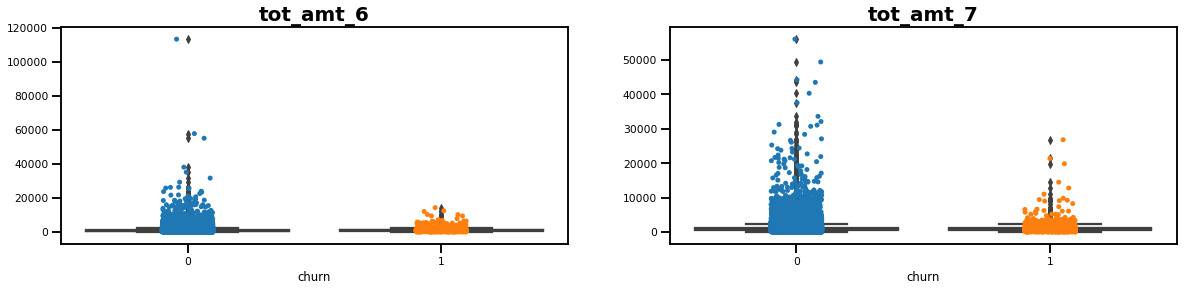

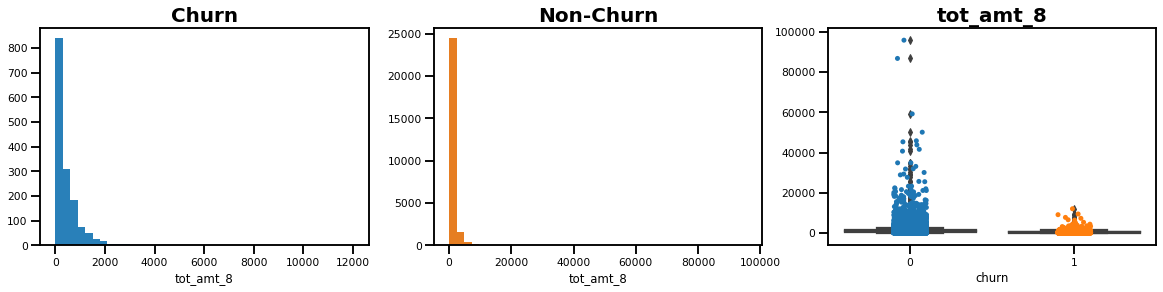

In [61]:
dist_box_plot(telecom,'tot_amt_6','tot_amt_7','tot_amt_8')

`There are lots of outliers in Total amount ,churn customers count increased from 6th to 8th month and amount decreased

### total_rech_num (Total no of recharges)

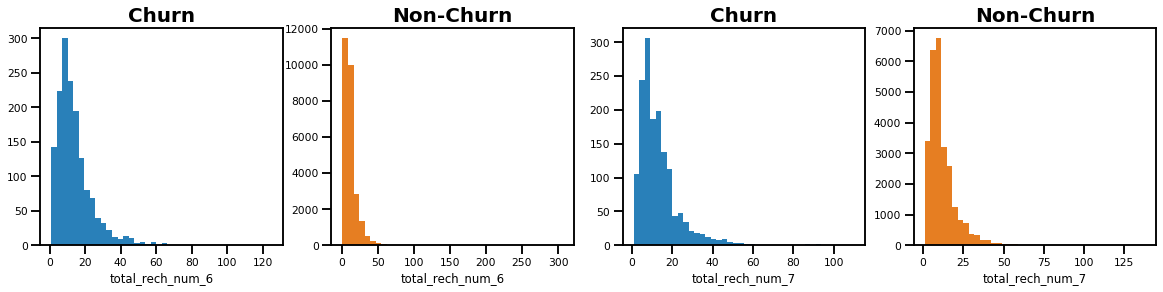

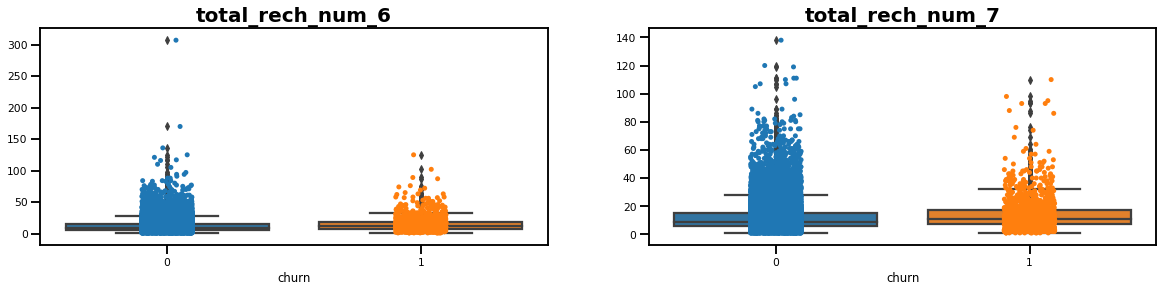

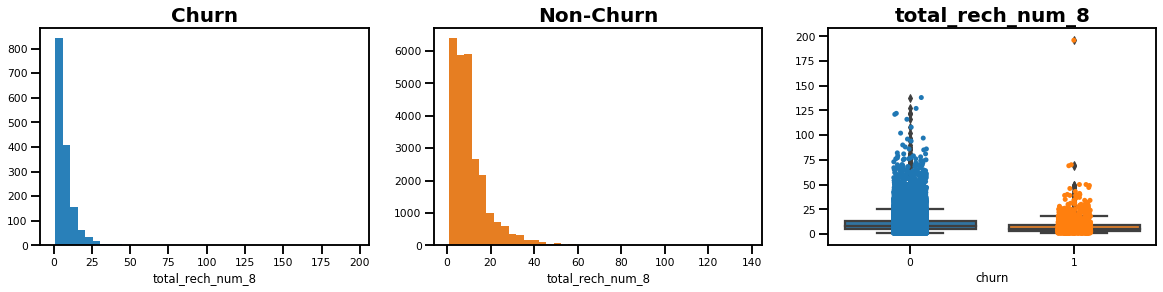

In [62]:
dist_box_plot(telecom,'total_rech_num_6','total_rech_num_7','total_rech_num_8')

`Total no of recharges decreased for churn customers in 8th month 

### aon(Age on network - number of days the customer is using the operator T network)

In [87]:
telecom['aon'].describe()
#plt.hist(telecom['aon'])

count    28163.000000
mean      1233.456627
std        962.975074
min        180.000000
25%        472.000000
50%        875.000000
75%       1810.500000
max       4321.000000
Name: aon, dtype: float64

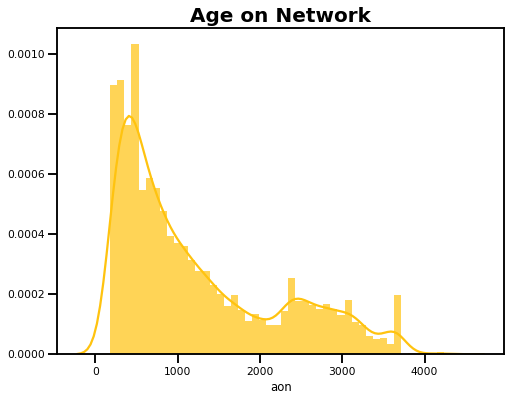

In [63]:
plt.figure(figsize=(8,6))
ax=sns.distplot(telecom['aon'],color='#FFC30F',hist_kws={"alpha": 0.7})
ax.set_title('Age on Network',fontweight='bold',size=20)
plt.show()

`For most of the customers Age on Network is around 800-900 days. There are outliers too as the maximum value is 4321

## Categorical columns

### Night pack user

In [89]:
pd.DataFrame(telecom.groupby(['night_pck_user_6','churn']).count()['arpu_6']).reset_index()

,night_pck_user_6,churn,arpu_6
0,0.0,0,26265
1,0.0,1,1514
2,1.0,0,360
3,1.0,1,24


<Figure size 720x432 with 0 Axes>

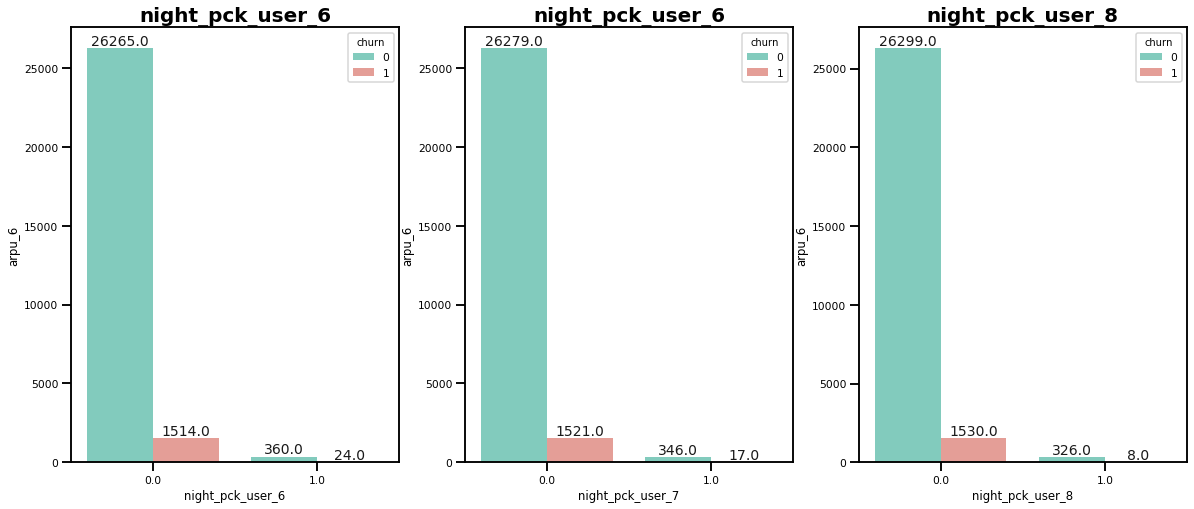

In [64]:
plt.figure(figsize=(10,6))
color=['#76D7C4','#F1948A']
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 8))
df_temp= pd.DataFrame(telecom.groupby(['night_pck_user_6','churn']).count()['arpu_6']).reset_index()
ax= sns.barplot(x=df_temp['night_pck_user_6'],y=df_temp['arpu_6'],hue=df_temp['churn'],palette=color,ax=axes[0])
showvalues(ax)
ax.set_title('night_pck_user_6',fontweight='bold',size=20)
df_temp= pd.DataFrame(telecom.groupby(['night_pck_user_7','churn']).count()['arpu_6']).reset_index()
ax= sns.barplot(x=df_temp['night_pck_user_7'],y=df_temp['arpu_6'],hue=df_temp['churn'],palette=color,ax=axes[1])
showvalues(ax)
ax.set_title('night_pck_user_6',fontweight='bold',size=20)
df_temp= pd.DataFrame(telecom.groupby(['night_pck_user_8','churn']).count()['arpu_6']).reset_index()
ax= sns.barplot(x=df_temp['night_pck_user_8'],y=df_temp['arpu_6'],hue=df_temp['churn'],palette=color,ax=axes[2])
showvalues(ax)
ax.set_title('night_pck_user_8',fontweight='bold',size=20)
plt.show()

`  ARPU is increasing from 6th to 8th month for churn customers who hasn't taken Night Pack service. And ARPU is getting decresed from 6th to 8th month for night pack users. Means moslty churn customers have stopped their night pack facility

### Fb User

<Figure size 720x432 with 0 Axes>

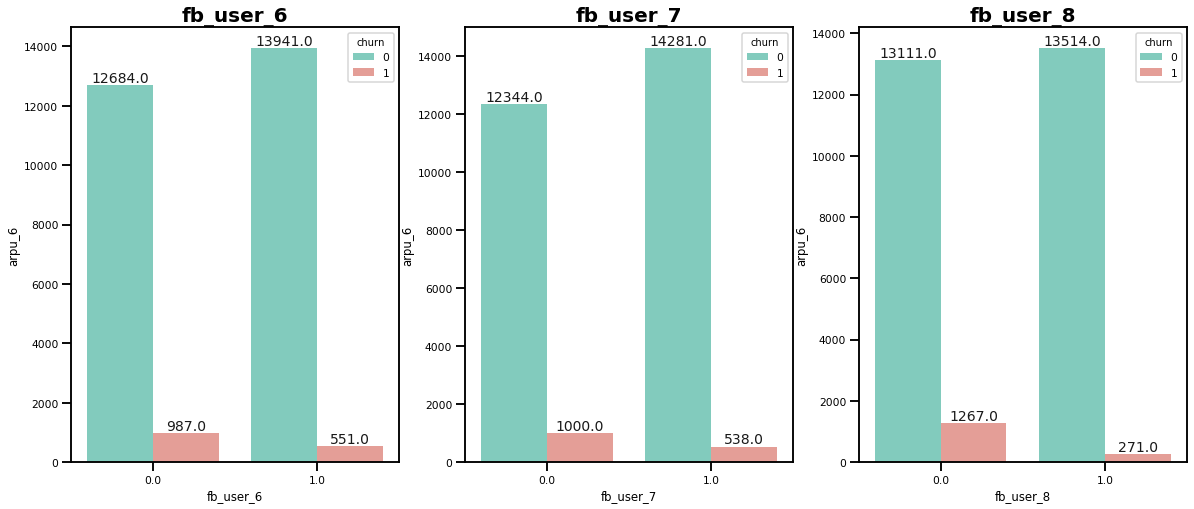

In [65]:
plt.figure(figsize=(10,6))
color=['#76D7C4','#F1948A']
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 8))
df_temp= pd.DataFrame(telecom.groupby(['fb_user_6','churn']).count()['arpu_6']).reset_index()
ax= sns.barplot(x=df_temp['fb_user_6'],y=df_temp['arpu_6'],hue=df_temp['churn'],palette=color,ax=axes[0])
showvalues(ax)
ax.set_title('fb_user_6',fontweight='bold',size=20)
df_temp= pd.DataFrame(telecom.groupby(['fb_user_7','churn']).count()['arpu_6']).reset_index()
ax= sns.barplot(x=df_temp['fb_user_7'],y=df_temp['arpu_6'],hue=df_temp['churn'],palette=color,ax=axes[1])
showvalues(ax)
ax.set_title('fb_user_7',fontweight='bold',size=20)
df_temp= pd.DataFrame(telecom.groupby(['fb_user_8','churn']).count()['arpu_6']).reset_index()
ax= sns.barplot(x=df_temp['fb_user_8'],y=df_temp['arpu_6'],hue=df_temp['churn'],palette=color,ax=axes[2])
showvalues(ax)
ax.set_title('fb_user_8',fontweight='bold',size=20)
plt.show()

` Significant drop in average revenue in 8th month (churn customers)  for the users who are avaialing fb_user facility.However ARPU is increasing for churn users who arent avaialing fb_users facility

In [66]:
# Function to plot columns related to minutes of usage with month
def plot_Churn_Mou(colList,calltype):
    fig, ax = plt.subplots(figsize=(7,4))
    df=telecom.groupby(['churn'])[colList].mean().T
    plt.plot(df)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    plt.legend(['Non-Churn', 'Churn'])
    plt.title("Avg. "+calltype+" MOU  V/S Month", loc='left', fontsize=12, fontweight=0, color='#F1948A')
    plt.xlabel("Month")
    plt.ylabel("Avg. "+calltype+" MOU")

In [67]:
# Function to plot columns related to minutes of usage with month
def plot_Churn(data,col):
    # per month churn vs Non-Churn
    fig, ax = plt.subplots(figsize=(7,4))
    colList=list(data.filter(regex=(col)).columns)
    colList = colList[:3]
    plt.plot(telecom.groupby('churn')[colList].mean().T)
    ax.set_xticklabels(['Jun','Jul','Aug','Sep'])
    plt.legend(['Non-Churn', 'Churn'])
    plt.title( str(col) +" V/S Month", loc='left', fontsize=12, fontweight=0, color='#F1948A')
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.show()

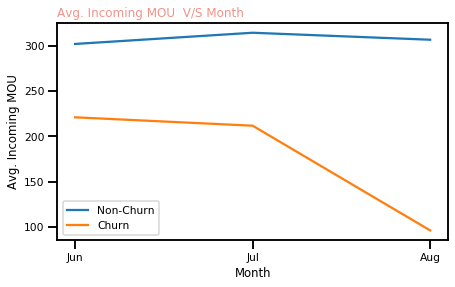

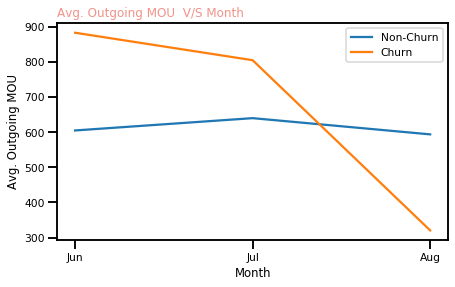

In [68]:
ic_mou = ['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8']
og_mou = ['total_og_mou_6','total_og_mou_7','total_og_mou_8']
plot_Churn_Mou(ic_mou,'Incoming')
plot_Churn_Mou(og_mou,'Outgoing')

`Significant drop in total incoming calls and total outgoing calls for churn customers , however for non churn customer its increasing

# Data Preparation

## Deriving New Features

`Creating derived features: og_to_ic_mou_6, og_to_ic_mou_7, og_to_ic_mou_8 These features will hold the ratio (=total_ogmou / total_icmou) for each month. These features will combine both incoming and outgoing informations and should be a better predictor of churn.`

In [69]:
# Creating new features which are ratio of total outgoing call with total incoming calls minutes of usage.
for i in range(6,9):
    telecom['tot_og_to_ic_mou_'+str(i)] = (telecom['total_og_mou_'+str(i)])/(telecom['total_ic_mou_'+str(i)]+1)

`Creating derived features: loc_og_to_ic_mou_6, loc_og_to_ic_mou_7, loc_og_to_ic_mou_8 These features will hold the ratio (=loc_ogmou / loc_icmou) for each month. These features will combine the local calls, both incoming and outgoing informations and should be a better predictor of churn.`

In [70]:
# Creating new features which are ratio of local outgoing call with local incoming calls minutes of usage
for i in range(6,9):
    telecom['loc_og_to_ic_mou_'+str(i)] = (telecom['loc_og_mou_'+str(i)])/(telecom['loc_ic_mou_'+str(i)]+1)

`Creating derived features: roam_og_to_ic_mou_6, roam_og_to_ic_mou_7, roam_og_to_ic_mou_8 These features will hold the ratio (=roam_og_mou / roam_ic_mou) for each month. These features will combine the roaming calls, both incoming and outgoing informations and should be a better predictor of churn.`

In [71]:
# Creating new features which are ratio of roaming outgoing call with local incoming calls minutes of usage
for i in range(6,9):
    telecom['roam_og_to_ic_mou_'+str(i)] = (telecom['roam_og_mou_'+str(i)])/(telecom['roam_ic_mou_'+str(i)]+1)

`Creating derived features: spl_og_to_ic_mou_6, spl_og_to_ic_mou_7, spl_og_to_ic_mou_8 These features will hold the ratio (=spl_og_mou / spl_ic_mou) for each month. These features will combine the Special calls, both incoming and outgoing informations and should be a better predictor of churn.`

In [72]:
# Creating new features which are ratio of Special outgoing call with local incoming calls minutes of usage
for i in range(6,9):
    telecom['spl_og_to_ic_mou_'+str(i)] = (telecom['spl_og_mou_'+str(i)])/(telecom['spl_ic_mou_'+str(i)]+1)

`Creating derived features: std_og_to_ic_mou_6, std_og_to_ic_mou_7, std_og_to_ic_mou_8 These features will hold the ratio (=std_og_mou / std_ic_mou) for each month. These features will combine the std calls, both incoming and outgoing informations and should be a better predictor of churn.`

In [73]:
# Creating new features which are ratio of std outgoing call with local incoming calls minutes of usage
for i in range(6,9):
    telecom['std_og_to_ic_mou_'+str(i)] = (telecom['std_og_mou_'+str(i)])/(telecom['std_ic_mou_'+str(i)]+1)

`Creating derived features: isd_og_to_ic_mou_6, isd_og_to_ic_mou_7, isd_og_to_ic_mou_8 These features will hold the ratio (=isd_og_mou / isd_ic_mou) for each month. These features will combine the isd calls, both incoming and outgoing informations and should be a better predictor of churn.`

In [74]:
# Creating new features which are ratio of isd outgoing call with local incoming calls minutes of usage
for i in range(6,9):
    telecom['isd_og_to_ic_mou_'+str(i)] = (telecom['isd_og_mou_'+str(i)])/(telecom['isd_ic_mou_'+str(i)]+1)

### tot_og_to_ic_mou( Total outgoing mou to incoming mou)

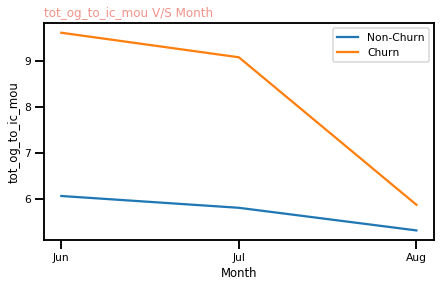

In [75]:
plot_Churn(telecom,'tot_og_to_ic_mou')

`As the ratio of outgoing to incoming seesm to be getting dropped for churn customer , we can say incoming calls were less in Jun and singificantly increases which cause the ratio to drop.

### loc_og_to_ic_mou( Local outgoing mou to incoming mou)

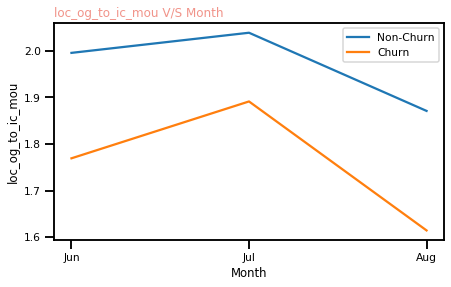

In [76]:
plot_Churn(telecom,'loc_og_to_ic_mou')

`Ratio is getting dropped for churn customers

### std_og_to_ic_mou( Std outgoing mou to incoming mou)

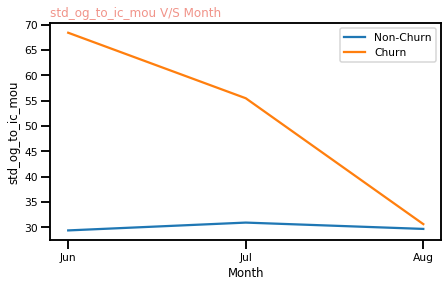

In [77]:
plot_Churn(telecom,'std_og_to_ic_mou')

### total_amount (Total amount)

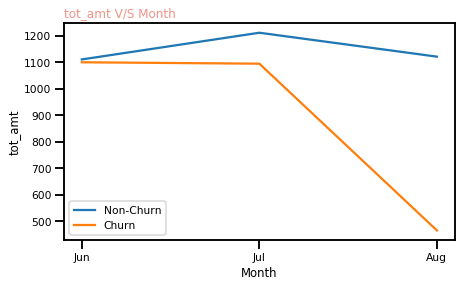

In [78]:
plot_Churn(telecom,'tot_amt')

`Total amount spent tends to decrease for the churn customers

`Creating derived features: total_vol_data - Combining vol_2g_mb and vol_3g_mb. These features will combine the 2g data usage and 3g data usage and should be a better predictor of churn.`

In [79]:
# Creating new features combining 2g and 3g
for i in range(6,9):
    telecom['total_vol_'+str(i)] = (telecom['vol_2g_mb_'+str(i)])+(telecom['vol_3g_mb_'+str(i)])

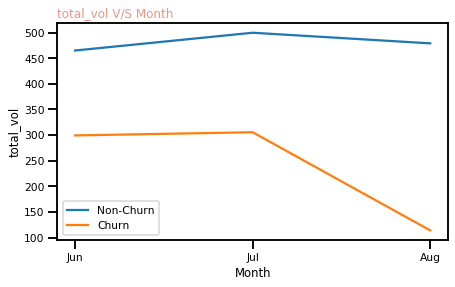

In [80]:
plot_Churn(telecom,'total_vol')

`Total data volume decreases for churn customer decreases as we go from jun to Aug

`Creating derived features: total_arpu - Combining arpu_2g and arpu_3g. These features will combine the average revenue per user from 2g and 3g data and should be a better predictor of churn.`

In [81]:
# Creating new features combining average revenue per user from 2g and 3g
for i in range(6,9):
    telecom['total_arpu_'+str(i)] = (telecom['arpu_3g_'+str(i)])+(telecom['arpu_3g_'+str(i)])

In [82]:
--

SyntaxError: invalid syntax (<ipython-input-82-4071a1fba099>, line 1)

In [ ]:
telecom.head()

### Derived Columns Analysis  

Abbrebation Examples

- T2T	Operator T to T, i.e. within same operator (mobile to mobile)	Airtel to Airtel mobile
- T2M    	Operator T to other operator mobile 	Airtel to Jio Mobile
- T2O    	Operator T to other operator fixed line 	Airtel to Jio Line
- T2F    	Operator T to fixed lines of T  	Airtel to Airtel Fixed line
- T2C    	Operator T to it’s own call center  	Airtel to its call center  -- we can do analysis on this column to check how many time customer call to its customer care ,Are they facing challenges ?


 Columns can be made :-
  - sum_onnet_offnet_mou_6 , _7 , _8 , _9 -- sum of onnet and offnet mou
  - sum_roam_ic_og_mou_6, _7,_8,_9     --- sum of roaming incoming and outgoing mou
  - sum_loc_og_t2t_M_mou_6 , _7 _8 , _9  --sum of  local outgoing calls made from one operator to same and other operator Mobile
  -  sum_loc_og_t2o_F_mou_6_7_8_9 -- sum of local calls from operator T to same and other operator fixed line
  
  - Below proof shows that Existing Column loc_og_mou_6 is equal to sum of 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6'
  
  - Below proof shows that Existing Column std_og_mou_6 = sum of 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2c_mou_6'
  
  - we have also total_of_mou_6 , which is also sum of all the outgoing (local +std +special+isd calls)
  
  - similalry columns for Local_incoming calls  also existing col loc_ic_mou_6 = sum of 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_t2c_mou_6'
  
  - std incoming calls existing col std_ic_mou_6 = sum of 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2c_mou_6'
  
  - existing col total_ic_mou_6 = sum of all the incoming calls for 6th month (local +std +special+isd + others calls)
  
  - weeks can extracted out of date_of_last_rech_6
  - total count of recharge (2g+3g)
  - sum of arpu 3g+2g
    
  - aug_vbc_3g_6 - Volume based cost - when no specific scheme is not purchased and paid as per usage, I think this can also be added to avg amount column ? need to check 


### Proof 
`As we can see below loc_og_mou_6 is the sum of other local outgoing minutes columns , we might consider totalOutgoing column  and drop other columns
  - i.e. loc_og_mou_6  = 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6'

In [ ]:
# code to validate sum of all the outgoing minc columns == loc_og_mou_6
telecom['total_loc_outgoingmins_6']= telecom[telecom.columns[telecom.columns.str.contains('loc_og') & telecom.columns.str.contains('_6') & ~ telecom.columns.str.contains('og_mou_6')]].sum( axis=1)
telecom['total_stdoutgoingmins_6']= telecom[telecom.columns[telecom.columns.str.contains('std_og') & telecom.columns.str.contains('_6') & ~ telecom.columns.str.contains('og_mou_6')]].sum( axis=1)

telecom[['total_loc_outgoingmins_6' ,'loc_og_mou_6','std_og_mou_6','total_stdoutgoingmins_6']].head()

In [ ]:
telecom.head()